# Titanic Dataset Analysis: Factors Influencing Passenger Survival

# 1.Project Overview

Dataset Description

Overview

The data has been split into two groups:

    training set (train.csv)
    test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome **(also known as the “ground truth”)** for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include **gender_submission.csv**, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

    Variable     Definition	                                   Key
    survival     Survival	                                     0 = No, 1 = Yes
    pclass	   Ticket class	                                 1 = 1st, 2 = 2nd, 3 = 3rd
    sex	      Sex
    Age	      Age in years
    sibsp	    # of siblings / spouses aboard the Titanic
    parch	    # of parents / children aboard the Titanic
    ticket	   Ticket number
    fare	     Passenger fare
    cabin	    Cabin number
    embarked     Port of Embarkation	                          C = Cherbourg, Q = Queenstown, S = Southampton

Variable Notes

    pclass: A proxy for socio-economic status (SES)
    1st = Upper
    2nd = Middle
    3rd = Lower

    age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

    sibsp: The dataset defines family relations in this way...
    Sibling = brother, sister, stepbrother, stepsister
    Spouse = husband, wife (mistresses and fiancés were ignored)

    parch: The dataset defines family relations in this way...
    Parent = mother, father
    Child = daughter, son, stepdaughter, stepson
    Some children travelled only with a nanny, therefore parch=0 for them.




**Exploratory Data Analysis (EDA)**
  - **Inspected the dataset** to understand its structure and identify key variables.
  - **Cleaned the data** by handling missing values, removing duplicates, and creating new features (e.g., "FamilySize").
  - **Performed univariate analysis** to explore individual variables like age, gender, and class.
  - **Conducted bivariate analysis** to compare survival rates across gender, class, age groups, fare, and family size.

**Key Findings**
   - **Overall Survival Rate**: Calculated the percentage of passengers who survived.
   - **Gender**: Analyzed how survival rates differed between males and females.
   - **Age**: Explored the impact of age on survival, including outlier detection and treatment.
   - **Class**: Compared survival rates across passenger classes (1st, 2nd, 3rd).
   - **Fare**: Investigated the relationship between fare paid and survival.
   - **Family Size**: Analyzed how family size (solo travelers vs. families) influenced survival.

**Techniques Used**
   - **Data Cleaning**: Handled missing values, removed duplicates, and imputed data.
   - **Descriptive Statistics**: Summarized key metrics like mean, median, and correlation.
   - **Visualizations**: Used bar plots, histograms, box plots, and heatmaps to illustrate findings.
   - **Outlier Detection**: Identified and treated outliers in variables like age.
   - **Grouped Analysis**: Compared survival rates across categories (e.g., gender, class, family size).

**Insights**
   - Women and children had higher survival rates.
   - First-class passengers were more likely to survive than those in lower classes.
   - Passengers with higher fares or smaller family sizes had better survival odds.

**Future Enhancements**
   - Explore additional variables like port of embarkation.
   - Incorporate advanced techniques like predictive modeling.


# 2.Data Collection and Understanding

## 2.1. Structure of dataset

In [134]:
# Importing necessary libraries
import numpy as np
import pandas as pd


# Checking versions of libraries
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")


Pandas version: 2.2.2
NumPy version: 2.0.2


In [135]:
import pandas as pd

# Original dataset source:  original_url = https://www.kaggle.com/competitions/titanic/data?select=train.csv

# RAW URL of the modified CSV file on GitHub
url = "https://raw.githubusercontent.com/FabriceGhislain7/data_analyst_scientist/main/titanic_project_python/data_titanic.csv"

# Load the dataset from GitHub
data = pd.read_csv(url)

# Display the first few rows
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [136]:
# Display the last 5 rows of the dataset

data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [137]:
# Return the size of the data, i.e., number of rows and columns
print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

data.shape

The dataset contains 891 rows and 12 columns.


(891, 12)

In [138]:
# Enumerate the columns of the dataset (i.e., the labels or headers of each column)

print("The column labels in the dataset are:")
data.columns

The column labels in the dataset are:


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [139]:
# Check the data types of each column in the dataset

print("Data types of each column in the dataset:")
data.dtypes

Data types of each column in the dataset:


,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [140]:
# Dataset information

print("Summary of the dataset:")
data.info()

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 2.2. Check the missing values.

In [141]:
# Identify missing values in the dataset

print("Missing values in the dataset (True = missing, False = present):")
data.isnull()


Missing values in the dataset (True = missing, False = present):


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [242]:
# Count the number of missing values in each column

print("Number of missing values per column:\n")

# Calculate missing values
data_mis_val = data.isnull().sum()

data_mis_val


Number of missing values per column:



,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [243]:
# Optional: Calculate the percentage of missing values per column
data_mis_val_perc = (data_mis_val / len(data)) * 100

print("Percentage of missing values per column:")
data_mis_val_perc

Percentage of missing values per column:


,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


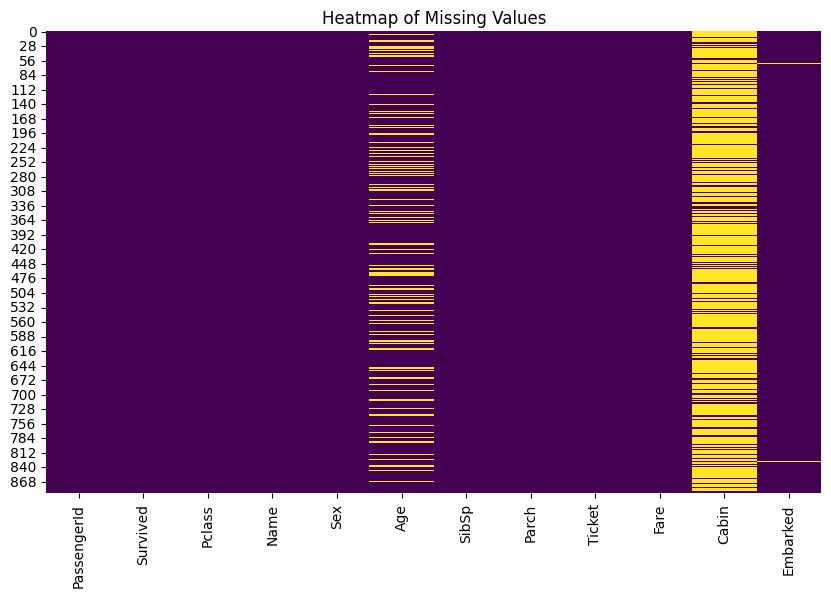

In [144]:
# Detailed visualization of missing values (optional)
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()

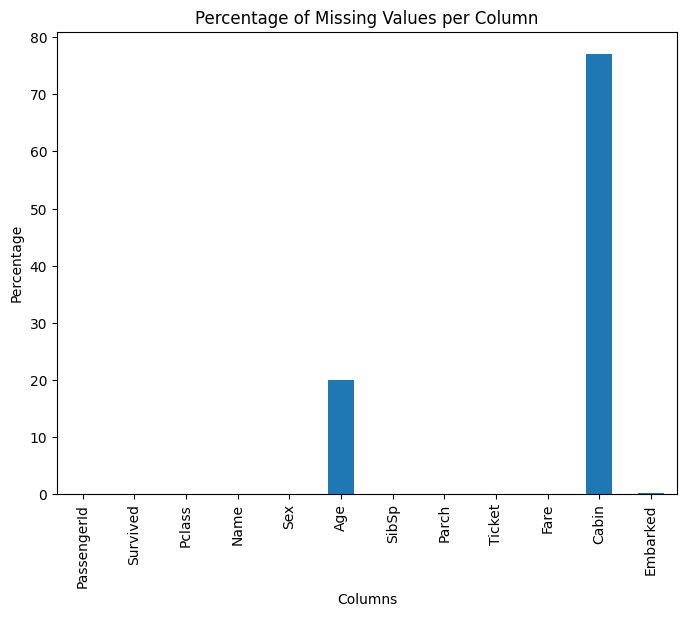

In [244]:
# Bar plot of missing values per column
data_mis_val_perc.plot(kind='bar', figsize=(8, 6))
plt.title("Percentage of Missing Values per Column")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.show()

## 2.3.Check the duplicates rows

In [246]:
# Check for duplicate rows in the dataset

data_dup_rows = data.duplicated()
data_dup_rows


,0
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,False


In [247]:
# Count and display the total number of duplicate rows

print(f"Number of duplicate rows: {data_dup_rows.sum()}")
data_dup_rows.sum()


Number of duplicate rows: 0


np.int64(0)

In [249]:
# Get the index of duplicate rows
data_dup_rows_ind = data_dup_rows[data_dup_rows].index
data_dup_rows_ind

Index([], dtype='int64')

In [149]:
# Identify columns where all values are missing

all_null_columns = data.columns[data.isnull().all()]
print(all_null_columns)


Index([], dtype='object')


In [250]:
# Create a DataFrame containing only duplicate rows for inspection
df_data_dup = data[data_dup_rows]
df_data_dup

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [251]:
# Check the memory usage of the dataset
print(data.memory_usage())

Index           132
PassengerId    7128
Survived       7128
Pclass         7128
Name           7128
Sex            7128
Age            7128
SibSp          7128
Parch          7128
Ticket         7128
Fare           7128
Cabin          7128
Embarked       7128
dtype: int64


# 3.Data Cleaning and Preprocessing

In [252]:
# 1. Overview of missing values per column
# Count the number of missing values in each column
mis_val_by_col = data.isnull().sum()
print(f"Number of missing values per column:\n{mis_val_by_col}")

# Check the total number of missing values in the dataset
print(f"Total number of missing values in the dataset: {mis_val_by_col.sum()}")


Number of missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Total number of missing values in the dataset: 866


## 3.1. Cleaning Method 1: Removing Duplicate Rows .


In [256]:
# Show the first few duplicate rows (if any)
if data.duplicated().any():
    print("Duplicate rows in the dataset:")
    print(data[data.duplicated()])
else:
    print("No duplicate rows found in the dataset.")


No duplicate rows found in the dataset.


In [258]:
# Removing duplicate rows
# ----------------------------------------
# The .drop_duplicates() method removes all duplicate rows, keeping only the first occurrence.
data_cleaned1 = data.drop_duplicates()

# Compare the number of rows before and after removing duplicates
num_duplicates = len(data) - len(data_cleaned1)

print(f"Number of rows before removing duplicates: {len(data)}")
print(f"Number of duplicate rows identified: {num_duplicates}")
print(f"Number of rows after removing duplicates: {len(data_cleaned1)}")


Number of rows before removing duplicates: 891
Number of duplicate rows identified: 0
Number of rows after removing duplicates: 891


## 3.2.Cleaning Method 2: Removing rows with missing values

In [156]:
# Define a threshold: If more than 50% of a column's values are missing, drop the column
threshold = data.shape[0] / 2  # At least 50% non-null values required

# Drop columns where more than 50% of values are missing
data_cleaned2 = data.dropna(axis=1, thresh=threshold)

# Compare the number of columns before and after removal
print(f"Number of columns before removing missing values: {data.shape[1]}")
print(f"Number of columns after removing missing values: {data_cleaned2.shape[1]}")

# Display dataset information to verify changes
data_cleaned2.info()


Number of columns before removing missing values: 12
Number of columns after removing missing values: 11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [157]:

# Now remove rows where 'Age' is missing
data_cleaned3 = data_cleaned2.dropna(subset=['Age', 'Embarked'])

# Compare the number of rows before and after removing missing 'Age' values
print(f"Number of rows before removing missing 'Age': {len(data_cleaned2)}")
print(f"Number of rows after removing missing 'Age': {len(data_cleaned3)}")
data_cleaned3.isnull().sum()

Number of rows before removing missing 'Age': 891
Number of rows after removing missing 'Age': 712


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## 3.3. Cleaning Method 3: Replacing missing values using the mean.

In [259]:
# Create data_cleaned4: Fill missing 'Age' values with its mean
# Make a copy to avoid modifying data_cleaned2

data_cleaned4 = data_cleaned2.copy()
data_cleaned4['Age'].fillna(data_cleaned4['Age'].mean(), inplace=True)

# Compare the number of missing values in 'Age' before and after replacement
print(f"Number of missing values in 'Age' before replacement: {data_cleaned2['Age'].isnull().sum()}")
print(f"Number of missing values in 'Age' after replacement: {data_cleaned4['Age'].isnull().sum()}")

# Display dataset information to verify changes
data_cleaned4.info()

Number of missing values in 'Age' before replacement: 177
Number of missing values in 'Age' after replacement: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


<ipython-input-259-a1ccaa3e0c3b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned4['Age'].fillna(data_cleaned4['Age'].mean(), inplace=True)


In [262]:
# In addition to the "Cabin" column, we copy "data_cleaned3",
# remove the "Ticket" and "Embarked" columns, which are not needed for our analysis,
# and name the new DataFrame "df".
df = data_cleaned3.copy()

# DataFrame with substituted values for the "Age" variable
df_subs = data_cleaned4.copy()

# Drop the "Ticket" and "Embarked" columns
df.drop(["Ticket", "Embarked"], axis=1, inplace=True)
df_subs.drop(["Ticket", "Embarked"], axis=1, inplace=True)

# Display the updated DataFrame
print(f"Final DataFrame after removing 'Age' values: {df.shape}")
print(f"Final DataFrame after substituting 'Age' values: {df_subs.shape}")


Final DataFrame after removing 'Age' values: (712, 9)
Final DataFrame after substituting 'Age' values: (891, 9)


Proportion of Data Types in the DataFrame

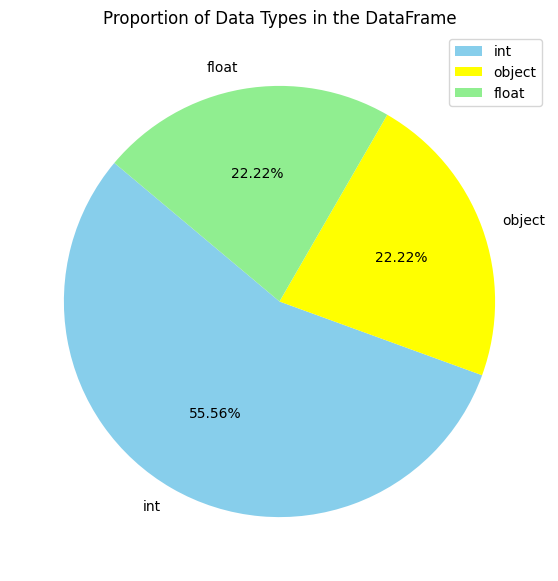

In [263]:
import matplotlib.pyplot as plt

# Count the number of columns by data type
data_types = df.dtypes.replace({'int64': 'int', 'float64': 'float', 'object': 'object'}).value_counts()

# Define labels and sizes for the pie chart
labels = data_types.index
sizes = data_types.values

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct=lambda p: f'{p:.2f}%', startangle=140, colors=["skyblue", "yellow", "lightgreen"])
plt.title("Proportion of Data Types in the DataFrame")
plt.legend()
plt.show()


# 4.Exploratory Data Analysis (EDA)

## 4.1. Descriptive Statistics of the Entire DataFrame and Grouped Data

Understanding iloc (Integer Location-Based Indexing)

In [161]:
# Select the first row (without specifying columns)
print("Select the first row (without specifying columns)")
print(df.iloc[0])
print()

# Select the first row (index 0) and all columns using `:`
print("Select the first row (index 0) and all columns using `:")
print(df.iloc[0, :])
print()

# Select the first two rows (index 0 to 1, excluding index 2)
print("Select the first two rows (index 0 to 1, excluding index 2):")
print(df.iloc[0:2])
print()

# Select all rows and only the last column, displaying the first 8 rows
print("Select all rows and only the last column, displaying the first 8 rows")
df.iloc[:, -1].head(8)


Select the first row (without specifying columns)
PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Fare                              7.25
Name: 0, dtype: object

Select the first row (index 0) and all columns using `:
PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Fare                              7.25
Name: 0, dtype: object

Select the first two rows (index 0 to 1, excluding index 2):
   PassengerId  Survived  Pclass  \
0            1         0       3   
1          

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500
6,51.8625
7,21.0750
8,11.1333


Understanding loc (Label-Based Indexing)

In [162]:
# Select the first row from the "Name" column
print(' Select the first row from the "Name" column')
print(df.loc[0, "Name"])
print()

# Select all rows from the "Name" column
print('Select all rows from the "Name" column')
df.loc[:, "Name"].head()


 Select the first row from the "Name" column
Braund, Mr. Owen Harris

Select all rows from the "Name" column


,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


### 4.1.1. Overall Descriptive Statistics of the Dataset.

In [163]:
# Get unique values only for categorical (object) columns, excluding "Name"
unique_values_object = {
    col: df[col].unique() for col in df.select_dtypes(include=['object']).columns if col != "Name"
}

# Display the unique values for each categorical column
for col, values in unique_values_object.items():
    print(f" Unique values in '{col}':\n{values}\n")


 Unique values in 'Sex':
['male' 'female']



In [164]:
# Statistical characteristics of all variables in the dataset, regardless of type
df.describe(include="all")
# df.describe(percentiles=[],include = 'all' )


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712,712,712.000000,712.000000,712.000000,712.000000
unique,NaN,NaN,NaN,712,2,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1,453,NaN,NaN,NaN,NaN
mean,448.589888,0.404494,2.240169,NaN,NaN,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,NaN,NaN,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,NaN,NaN,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,NaN,NaN,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,1.000000,33.000000


In [165]:
# If I only want a statistical description of the numerical variables,
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [166]:
# I can decide to specify percentiles.
df.describe(percentiles=[0.25, 0.5, 0.75], include='all')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712,712,712.000000,712.000000,712.000000,712.000000
unique,NaN,NaN,NaN,712,2,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1,453,NaN,NaN,NaN,NaN
mean,448.589888,0.404494,2.240169,NaN,NaN,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,NaN,NaN,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,NaN,NaN,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,NaN,NaN,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,1.000000,33.000000


In [167]:
# We can specify the percentiles we are interested in.
df.describe(percentiles=[0.20, 0.40, 0.60, 0.80])


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
20%,179.200000,0.000000,1.000000,19.000000,0.000000,0.000000,7.901640
40%,356.400000,0.000000,2.000000,25.000000,0.000000,0.000000,12.925000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
60%,540.600000,1.000000,3.000000,31.000000,0.000000,0.000000,26.000000
80%,717.800000,1.000000,3.000000,41.000000,1.000000,1.000000,46.900000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [168]:
# You can generate df statistics without including a particular category.
df.describe(exclude=["object"])


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [169]:
# Here, we have removed the numerical variables (‘int’ and ‘float’), keeping only categorical variables (‘object’).
# As a result, the statistical summary will only include categorical columns.
# Since the remaining variables are non-numeric, percentiles are not displayed in the output.

df.describe(exclude=['int', 'float'])

# If we try to add the `percentiles` parameter to the previous code, we get an error.
# This happens because there are no numerical variables left to calculate percentiles.

# df.describe(exclude=['int', 'float'], percentiles=[0.20, 0.40, 0.60])  # This code will result in an error.

# Alternative: If you need a summary of both categorical and numerical variables, use:
# df.describe(include='all')


,Name,Sex
count,712,712
unique,712,2
top,"Dooley, Mr. Patrick",male
freq,1,453


In [170]:
# You can also include only the columns that interest us.
# In this case, we will include both categorical and numerical variables.

df[['Name', 'Sex', 'Age', 'Survived']].describe()

# If we want to see a statistical summary including both numerical and categorical columns, we use:
# df[['Name', 'Sex', 'Age', 'Survived']].describe(include='all')


,Age,Survived
count,712.000000,712.000000
mean,29.642093,0.404494
std,14.492933,0.491139
min,0.420000,0.000000
25%,20.000000,0.000000
50%,28.000000,0.000000
75%,38.000000,1.000000
max,80.000000,1.000000


Visualize numerical variables (histograms, boxplots)

<Figure size 1200x600 with 0 Axes>

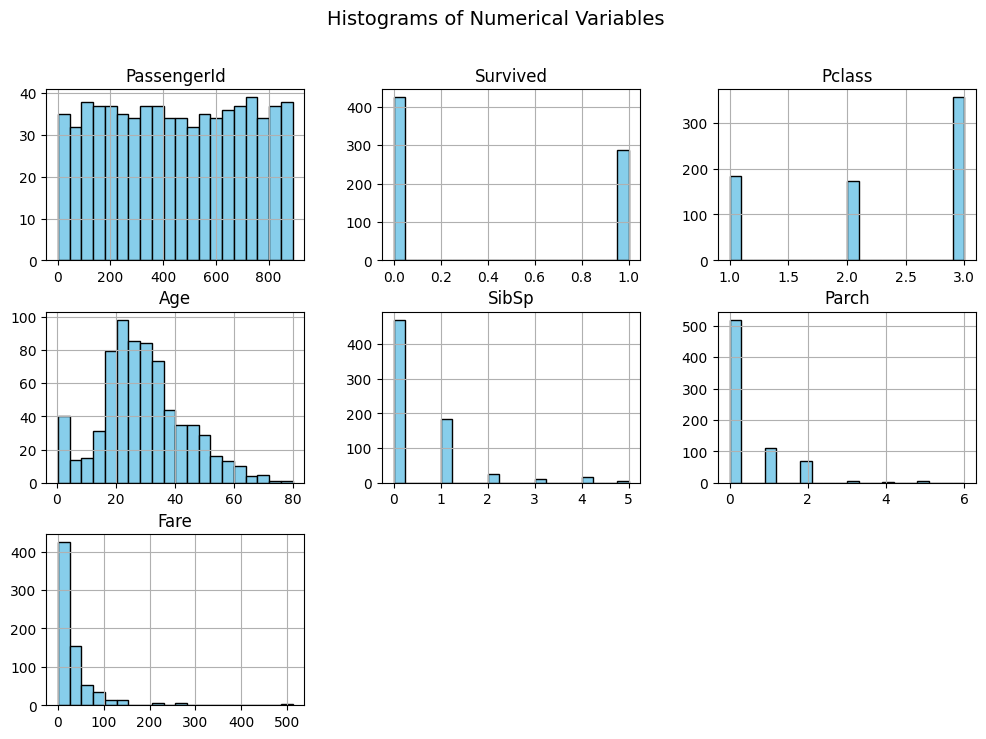

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for all numerical variables
dfn = df.select_dtypes(include=["int64", "float64"])  # Select only numerical columns

plt.figure(figsize=(12, 6))
dfn.hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Variables", fontsize=14)
plt.show()


Observations

- Before generating the boxplot, "PassengerId" was removed because it is a unique identifier and does not contribute to statistical analysis.  
- Keeping "PassengerId" distorts the boxplot, as its large numerical values compress the scale of other variables, making their distributions harder to interpret.  
- Boxplots are meant for meaningful numerical variables like "Age", "Fare", "SibSp", and "Parch", which have statistical significance.  
- Removing unnecessary variables (such as "PassengerId", "Ticket", or "Name") improves the clarity and accuracy of visualizations.  


In [172]:
# Create a new DataFrame without "PassengerId"
dfn_new = dfn.drop(["PassengerId"], axis=1, inplace=False)

# Check the structure of the modified DataFrame
dfn_new.info()


<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 55.1 KB


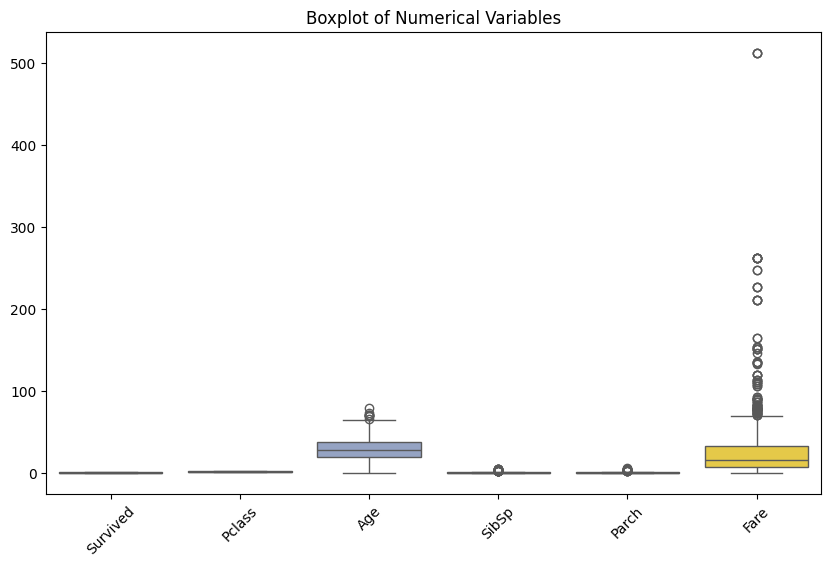

In [173]:

# Plot boxplots for numerical variables
plt.figure(figsize=(10, 6))
sns.boxplot(data=dfn_new, palette="Set2")
plt.title("Boxplot of Numerical Variables")
plt.xticks(rotation=45)
plt.show()


Detecting & Handling Outliers in the Entire DataFrame

In [174]:
import numpy as np
import pandas as pd

def detect_and_handle_outliers(df, method="IQR", replace_with="mean", lower_q=0.25, upper_q=0.75, column="all"):
    """
    Detects and either removes or replaces outliers in a DataFrame using the IQR method.

    Parameters:
    - df (DataFrame): The input DataFrame.
    - method (str): The method used to handle outliers. Options: "IQR" (Interquartile Range).
    - replace_with (str): The method to replace outliers. Options: "remove", "mean", "median", or "mode".
    - lower_q (float): Lower quantile threshold (default 0.25).
    - upper_q (float): Upper quantile threshold (default 0.75).
    - column (str): Column to process. If "all", applies to all numerical columns.

    Returns:
    - df_outliers (DataFrame): A DataFrame containing only the detected outliers.
    - df_cleaned (DataFrame): A DataFrame after outlier removal or replacement.
    """

    df_outliers = pd.DataFrame()  # Initialize empty DataFrame
    df_cleaned = df.copy()  # Copy of the original DataFrame

    # Determine which columns to process
    if column == "all":
        cols_to_process = df.select_dtypes(include=["int64", "float64"]).columns
    else:
        if column in df.columns and df[column].dtype in ["int64", "float64"]:
            cols_to_process = [column]
        else:
            raise ValueError(f"Column '{column}' is not numerical or does not exist in the DataFrame.")

    # Loop through selected numerical columns #
    for col in cols_to_process:
        Q1 = df[col].quantile(lower_q)
        Q3 = df[col].quantile(upper_q)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Detect outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        # Fix: Only concatenate if outliers exist
        if not outliers.empty:
            df_outliers = pd.concat([df_outliers, outliers])

        if method == "IQR":
            if replace_with == "remove":
                # Remove outliers
                df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
            elif replace_with == "mean":
                # Replace outliers with the mean
                mean_value = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)][col].mean()
                df_cleaned.loc[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound), col] = mean_value
            elif replace_with == "median":
                # Replace outliers with the median
                median_value = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)][col].median()
                df_cleaned.loc[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound), col] = median_value
            elif replace_with == "mode":
                # Replace outliers with the mode
                mode_value = df_cleaned[col].mode()[0]
                df_cleaned.loc[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound), col] = mode_value

    return df_outliers, df_cleaned

# Detect and remove outliers for all numerical columns
dfn_outliers_removed, dfn_cleaned_removed = detect_and_handle_outliers(dfn_new, method="IQR", replace_with="remove")
print(dfn_cleaned_removed.info())
print()

# Detect and replace outliers with the mean for all numerical columns
dfn_outliers_replaced, dfn_cleaned_replaced = detect_and_handle_outliers(dfn_new, method="IQR", replace_with="mean")
print(dfn_cleaned_replaced.info())

<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  564 non-null    int64  
 1   Pclass    564 non-null    int64  
 2   Age       564 non-null    float64
 3   SibSp     564 non-null    int64  
 4   Parch     564 non-null    int64  
 5   Fare      564 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 30.8 KB
None

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    float64
 1   Pclass    712 non-null    float64
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    float64
 4   Parch     712 non-null    float64
 5   Fare      712 non-null    float64
dtypes: float64(6)
memory usage: 55.1 KB
None


<ipython-input-174-93d814174879>:56: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.4044943820224719' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cleaned.loc[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound), col] = mean_value
<ipython-input-174-93d814174879>:56: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.240168539325843' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cleaned.loc[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound), col] = mean_value
<ipython-input-174-93d814174879>:56: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.34416543574593794' has dtype incompatible with int64, please explicitly cast to a c

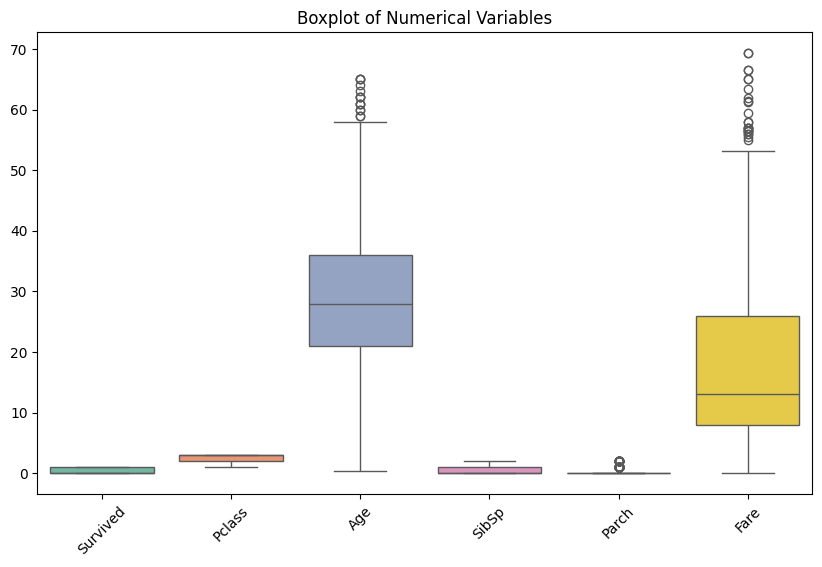

In [175]:

# Plot boxplots for numerical variables
plt.figure(figsize=(10, 6))
sns.boxplot(data = dfn_cleaned_removed, palette="Set2")
plt.title("Boxplot of Numerical Variables")
plt.xticks(rotation=45)
plt.show()


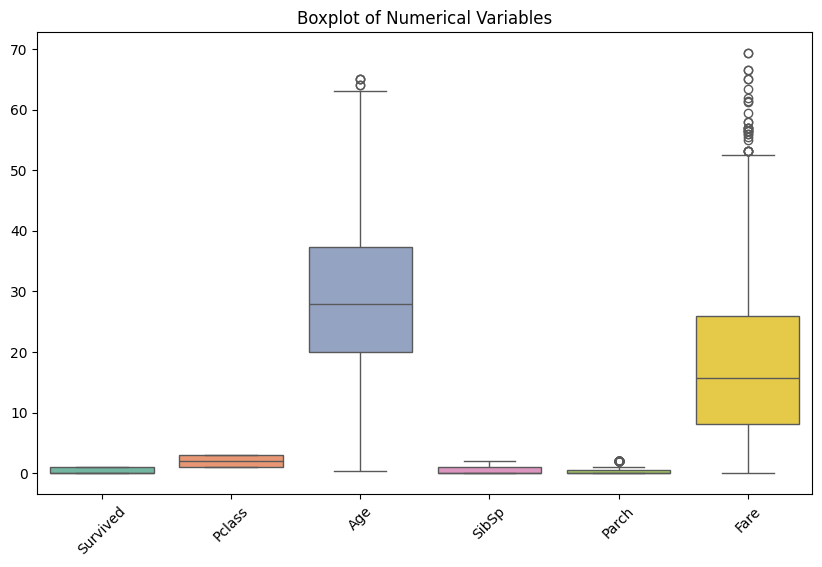

In [176]:
# Plot boxplots for numerical variables
plt.figure(figsize=(10, 6))
sns.boxplot(data = dfn_cleaned_replaced, palette="Set2")
plt.title("Boxplot of Numerical Variables")
plt.xticks(rotation=45)
plt.show()


Observations :

- Applying the general outlier-handling function across the dataset improves the boxplot representation by reducing extreme deviations.  
- Some outliers are still present, indicating that the IQR method alone may not fully eliminate extreme values in all cases.  
- The replacement method (mean, median, or mode) provides a better boxplot representation compared to removal, as it preserves the number of observations while smoothing extreme values.  
- The removal method, while effective in eliminating outliers, reduces the dataset size, which may lead to a loss of valuable information and affect overall data distribution.  
- Using replacement instead of removal keeps the data more balanced, preventing excessive gaps in visualization and allowing for a more interpretable boxplot.  


### 4.1.2. Correlation Matrix and Relationship Between Variables.

We generate a heatmap for displaying the correlation matrix.

Spearman correlation (monotonic relationships)

In [177]:
# Select only numerical variables
dfn = df.select_dtypes(include="number")

# Compute the Spearman correlation matrix
corr_spearman = dfn.corr(method="spearman")

# Display the Spearman correlation matrix
print("\n Spearman Correlation Matrix:")
print(corr_spearman)



 Spearman Correlation Matrix:
             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000  0.029948 -0.034687  0.039604 -0.066149 -0.005457   
Survived        0.029948  1.000000 -0.357628 -0.057032  0.075780  0.158864   
Pclass         -0.034687 -0.357628  1.000000 -0.358490 -0.053805 -0.020897   
Age             0.039604 -0.057032 -0.358490  1.000000 -0.180426 -0.253183   
SibSp          -0.066149  0.075780 -0.053805 -0.180426  1.000000  0.426322   
Parch          -0.005457  0.158864 -0.020897 -0.253183  0.426322  1.000000   
Fare           -0.020404  0.335672 -0.728700  0.130632  0.427503  0.411009   

                 Fare  
PassengerId -0.020404  
Survived     0.335672  
Pclass      -0.728700  
Age          0.130632  
SibSp        0.427503  
Parch        0.411009  
Fare         1.000000  


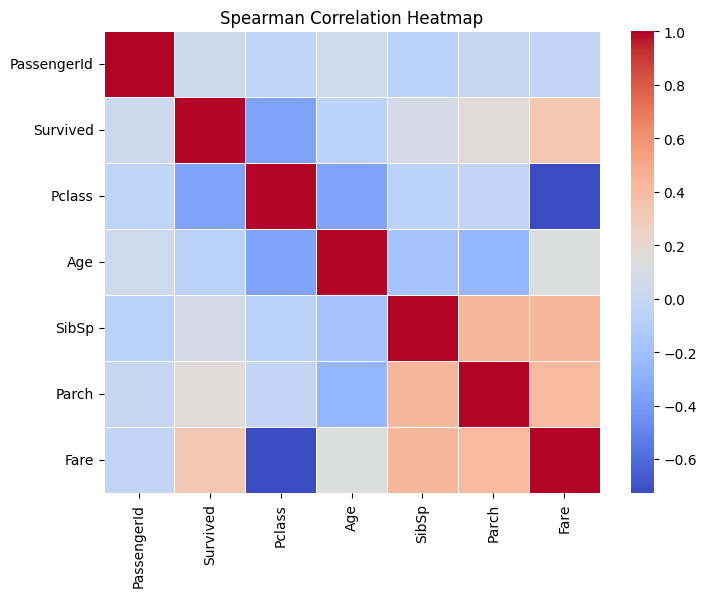

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical variables
dfn = df.select_dtypes(include="number")

# Compute the Spearman correlation matrix
corr_spearman = dfn.corr(method="spearman")

# Create a heatmap to visualize the Spearman correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_spearman, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation Heatmap")
plt.show()


## 4.2. Univariate and Bivariate Analysis

### 4.2.1. Univariate Analysis (Exploring Single Variables)  (Numerical_variable_choice = "Age")

In [179]:
print(df["Age"])                           # This is how to access a column
# dfn.Age.head()                            # You can also write it like this (5 first rows)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 712, dtype: float64


In [180]:
# Accessing the first three values of the 'Age' column

print(df["Age"][0:3])  # Displays the first three values in the 'Age' column
# df.Age[0:3]  # Alternative way to write it



0    22.0
1    38.0
2    26.0
Name: Age, dtype: float64


In [181]:
# Sort the values of the 'Age' column in ascending order
sorted_ages = df["Age"].sort_values()

# Display the 5 sorted values (without modifying the original DataFrame)
print(sorted_ages.head())


803    0.42
755    0.67
644    0.75
469    0.75
78     0.83
Name: Age, dtype: float64


In [182]:
# Sort the 5 values of a variable in a ascending manner in a column.

df.sort_values(by="Age", ascending =True).head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,8.5167
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,14.5000
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,19.2583
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,19.2583
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,29.0000


In [183]:
# Sort the 5 values of a variable in a descending manner in a column.

df.sort_values(by="Age", ascending = False).head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,30.0000
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,7.7750
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,34.6542
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,49.5042
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,7.7500


In [184]:
# We can obtain the indices of the values found between our variables

print(df["Age"].argsort().head())


0    639
1    601
2    508
3    373
4     58
Name: Age, dtype: int64


In [185]:
# calculate the average explicitly. There are two ways we can use
print(df["Age"].mean())
# df.Age.mean()

29.64209269662921


In [186]:
# Allows us to count for each individual value in the Series

df['Age'].value_counts()
# df.Age.value_counts()

,count
Age,
24.00,30
22.00,27
18.00,26
28.00,25
30.00,25
...,...
24.50,1
0.67,1
0.42,1


In [187]:
# Calculate the mode of the 'Age' column
print(df["Age"].mode())

# Alternative way
# df.Age.mode()


0    24.0
Name: Age, dtype: float64


In [188]:
# Calculate the median of 'Age'
print(df["Age"].median())

# Alternative way
df.Age.median()


28.0


28.0

In [189]:
# Calculate variance of 'Age'
print(df["Age"].var())

# Alternative way
# df.Age.var()


210.04510405327994


In [190]:
# Calculate standard deviation of 'Age'
print(df["Age"].std())

# Alternative way
df.Age.std()


14.49293290032352


14.49293290032352

In [191]:
# Generate descriptive statistics for the 'Age' column
age_description = df["Age"].describe(percentiles = [0.2])

# Display the statistics
print("Descriptive Statistics for 'Age':")
print(age_description)


Descriptive Statistics for 'Age':
count    712.000000
mean      29.642093
std       14.492933
min        0.420000
20%       19.000000
50%       28.000000
max       80.000000
Name: Age, dtype: float64


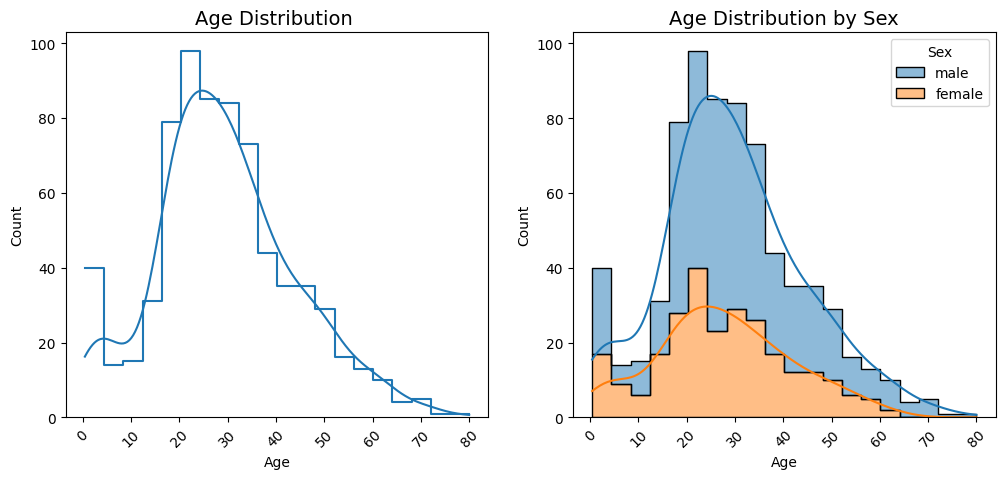

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram with multiple options
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df, x="Age", bins=20, kde=True, element="step", multiple="stack", fill=False)

# Formatting
plt.title("Age Distribution ", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Histogram with multiple options
plt.subplot(1, 2, 2)
sns.histplot(df, x="Age", hue="Sex", bins=20, kde=True, element="step", multiple="stack", fill=True)

# Formatting
plt.title("Age Distribution by Sex", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

plt.show()


<ipython-input-193-8da29ad67f89>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df["Age"], palette="Set2", ax=axes[1])


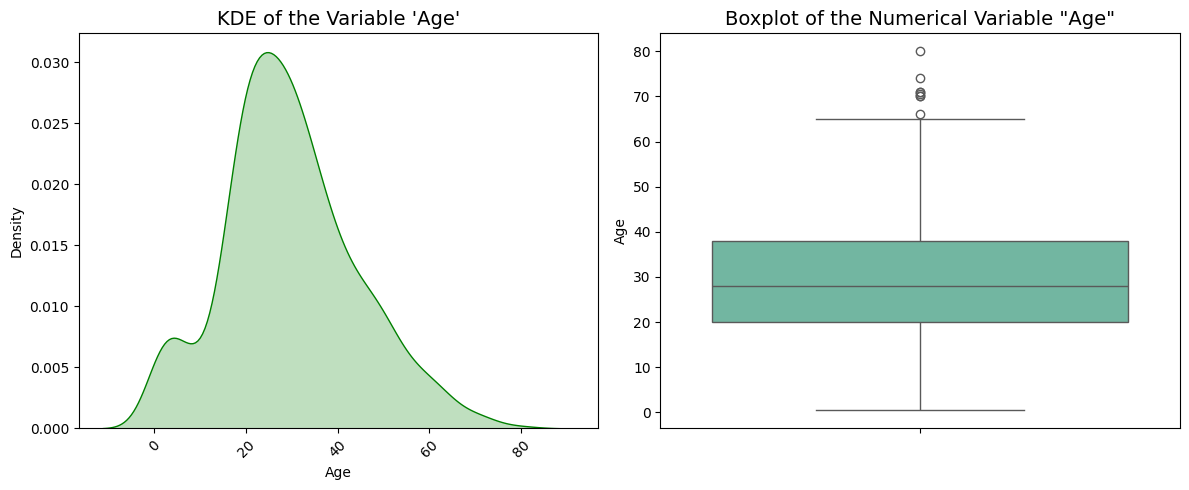

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 1 KDE Plot for 'Age'
sns.kdeplot(df["Age"], color="green", fill=True, ax=axes[0])
axes[0].set_title("KDE of the Variable 'Age'", fontsize=14)
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Density")
axes[0].tick_params(axis='x', rotation=45)

# 2 Boxplot for 'Age'
sns.boxplot(y=df["Age"], palette="Set2", ax=axes[1])
axes[1].set_title('Boxplot of the Numerical Variable "Age"', fontsize=14)
axes[1].set_ylabel("Age")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


Detecting Outliers with a Boxplot

Detecting Outliers with the IQR (Interquartile Range) Method

In [194]:
import numpy as np

# Calculate the quartiles
Q1 = df["Age"].quantile(0.25)  # 1st quartile (25%)
Q3 = df["Age"].quantile(0.75)  # 3rd quartile (75%)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound_age = Q1 - 1.5 * IQR
upper_bound_age = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound_age}")
print(f"Upper bound: {upper_bound_age}")

# Identify outliers on the variable "Age"
outliers_age = df[(df["Age"] < lower_bound_age) | (df["Age"] > upper_bound_age)]
print('Detected Outliers on the "Age" avriable:')
print(outliers_age)

Lower bound: -7.0
Upper bound: 65.0
Detected Outliers on the "Age" avriable:
     PassengerId  Survived  Pclass                                  Name  \
33            34         0       2                 Wheadon, Mr. Edward H   
96            97         0       1             Goldschmidt, Mr. George B   
116          117         0       3                  Connors, Mr. Patrick   
493          494         0       1               Artagaveytia, Mr. Ramon   
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
672          673         0       2           Mitchell, Mr. Henry Michael   
745          746         0       1          Crosby, Capt. Edward Gifford   
851          852         0       3                   Svensson, Mr. Johan   

      Sex   Age  SibSp  Parch     Fare  
33   male  66.0      0      0  10.5000  
96   male  71.0      0      0  34.6542  
116  male  70.5      0      0   7.7500  
493  male  71.0      0      0  49.5042  
630  male  80.0      0      0  30

 Manage outliers of the variable "Age" by removing them from the dataset

In [195]:
# Option: Remove outliers of the variable "Age" from the dataset
df_cleaned_remove_age = df[(df["Age"] >= lower_bound_age) & (df["Age"] <= upper_bound_age)]
print(df_cleaned_remove_age.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare  
0      0   7.2500  
1      0  71.2833  
2      0   7.9250  
3      0  53.1000  
4      0   8.0500  


<ipython-input-196-2103eb990dc4>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_cleaned_remove_age["Age"], palette="Set2", ax=axes[1])


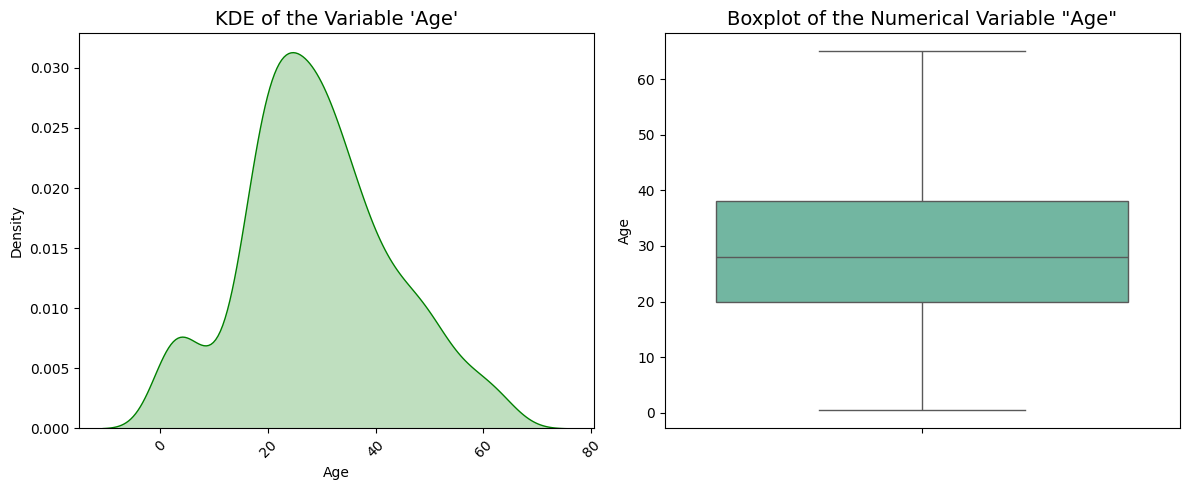

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 1 KDE Plot for 'Age'
sns.kdeplot(df_cleaned_remove_age["Age"], color="green", fill=True, ax=axes[0])
axes[0].set_title("KDE of the Variable 'Age'", fontsize=14)
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Density")
axes[0].tick_params(axis='x', rotation=45)

# 2 Boxplot for 'Age'
sns.boxplot(y=df_cleaned_remove_age["Age"], palette="Set2", ax=axes[1])
axes[1].set_title('Boxplot of the Numerical Variable "Age"', fontsize=14)
axes[1].set_ylabel("Age")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


 Manage outliers of the variable "Age" by remplace them by the mean from the dataset

In [197]:
import numpy as np

# Calculate the mean of 'Age' (excluding outliers)
mean_age = df[(df["Age"] >= lower_bound_age) & (df["Age"] <= upper_bound_age)]["Age"].mean()

# Replace outlier values with the mean
df_filled_age = df.copy()  # Create a copy of the original DataFrame
df_filled_age.loc[(df_filled_age["Age"] < lower_bound_age) | (df_filled_age["Age"] > upper_bound_age), "Age"] = mean_age

# Display the modified DataFrame
print("Dataset with Outliers Replaced by Mean:")
print(df_filled_age.head())


Dataset with Outliers Replaced by Mean:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare  
0      0   7.2500  
1      0  71.2833  
2      0   7.9250  
3      0  53.1000  
4      0   8.0500  


<ipython-input-198-99a90b08a49f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_filled_age["Age"], palette="Set2", ax=axes[1])


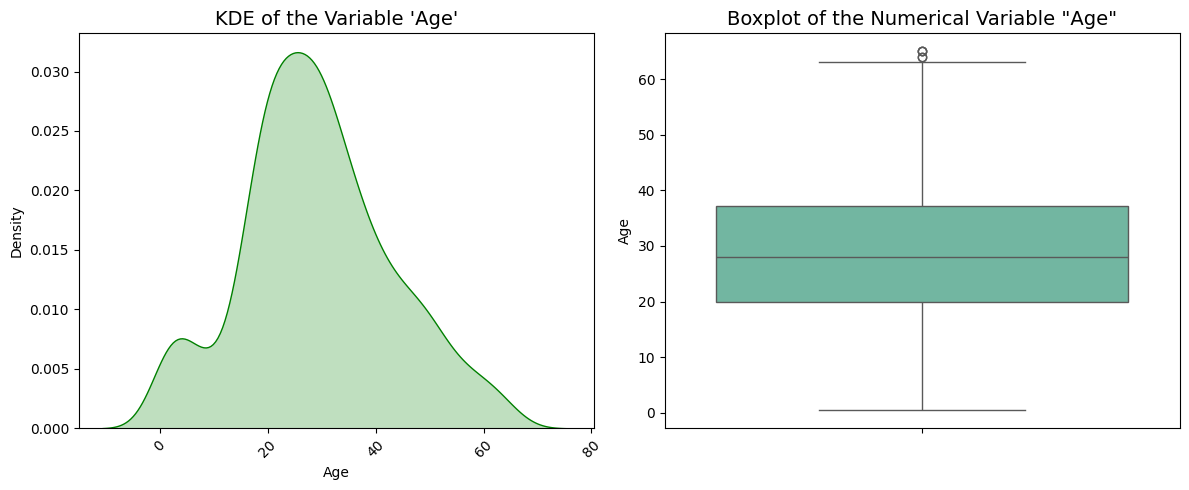

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 1 KDE Plot for 'Age'
sns.kdeplot(df_filled_age["Age"], color="green", fill=True, ax=axes[0])
axes[0].set_title("KDE of the Variable 'Age'", fontsize=14)
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Density")
axes[0].tick_params(axis='x', rotation=45)

# 2 Boxplot for 'Age'
sns.boxplot(y=df_filled_age["Age"], palette="Set2", ax=axes[1])
axes[1].set_title('Boxplot of the Numerical Variable "Age"', fontsize=14)
axes[1].set_ylabel("Age")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


###  Conclusion on Outlier Treatment in "Age" Variable  

After analyzing and handling outliers in the "Age" variable using two different approaches, we observed the following:  

1. Eliminating Outliers Using the Interquartile Range (IQR) Method.
   - This method completely removed all outlier values** that fell outside the calculated IQR boundaries.
   - While this ensures that extreme values do not distort the analysis, it also results in data loss by reducing the number of observations.

2. Replacing Outliers with the Mean.  
   - Instead of removing outliers, this method replaced them with the mean of non-outlier values.
   - This approach preserved all observations, ensuring no data loss.
   - However, some of the extreme values were still present in the dataset but were transformed to a less extreme value.

 Key Takeaways  
- The IQR method is effective in completely eliminating outliers, which is useful when outliers represent errors or extreme anomalies.  
- Replacing outliers with the mean retains all data points, which can be beneficial when dealing with small datasets or when outliers hold some meaningful information.  
- The choice of method depends on the objective**:  
  - If preserving all data is crucial → Use replacement methods (mean, median, etc.).  
  - If ensuring a clean dataset without extreme influence is a priority → Use elimination methods (IQR, Z-score, etc.).  


### 4.2.2. Summarize categorical variables (Exploring Single Variables) (Categorical variable choice = "Survived")


In [199]:
# To observe the n first rows of a column "Survived"

df["Survived"][0:3]

,Survived
0,0
1,1
2,1


In [200]:
# This is how to access the 5 first rowws of a catherorical column "Survived"

print (df["Survived"].head())
# dfn.Survived                        #  We can also write it like this
# dfn['Survived']                     # Here is another way to access a column

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [201]:
# Count the number of occurrences for each category
print(df["Survived"].value_counts())


Survived
0    424
1    288
Name: count, dtype: int64


In [202]:
# Calculate the proportion of each category
print(df["Survived"].value_counts(normalize=True))  # Gives percentages


Survived
0    0.595506
1    0.404494
Name: proportion, dtype: float64


In [203]:
# Calculate the mean (only meaningful if 0/1 coding is used)
print(df["Survived"].mean())  # Survival rate


0.4044943820224719


In [204]:
# Calculate the mode (most frequent value)
print(df["Survived"].mode())


0    0
Name: Survived, dtype: int64


In [205]:
# Standard deviation (meaningful if binary 0/1)
print(df["Survived"].std())


0.4911389472541192


<ipython-input-206-24bd84d26f77>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Survived", palette="coolwarm", ax=axes[0])
<ipython-input-206-24bd84d26f77>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(["Not Survived", "Survived"])


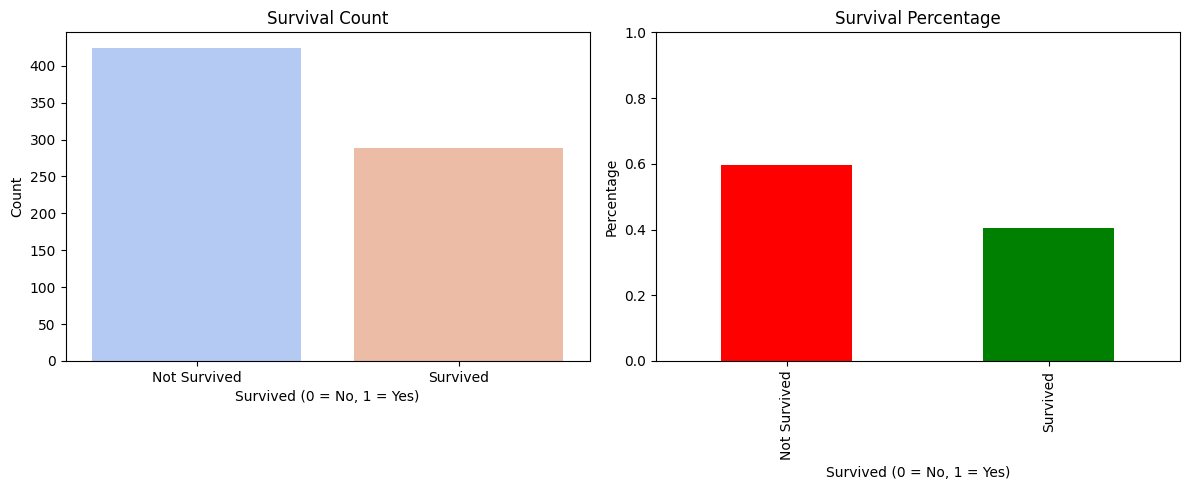

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 1 Count Plot (Absolute Count of Survived vs Not Survived)
sns.countplot(data=df, x="Survived", palette="coolwarm", ax=axes[0])
axes[0].set_title("Survival Count")
axes[0].set_xlabel("Survived (0 = No, 1 = Yes)")
axes[0].set_ylabel("Count")
axes[0].set_xticklabels(["Not Survived", "Survived"])

# 2 Percentage Plot (Proportion of Survived vs Not Survived)
df["Survived"].value_counts(normalize=True).plot(
    kind="bar", color=["red", "green"], ax=axes[1]
)
axes[1].set_title("Survival Percentage")
axes[1].set_xlabel("Survived (0 = No, 1 = Yes)")
axes[1].set_ylabel("Percentage")
axes[1].set_xticklabels(["Not Survived", "Survived"])
axes[1].set_ylim(0, 1)  # Ensure y-axis is scaled for percentage

# Show the plots
plt.tight_layout()
plt.show()


Interpretation:  
- A total of 424 passengers (60%) did not survive, while 288 passengers (40%) survived.  
- The majority of passengers perished, with a significant survival gap.  
- The survival rate being less than half (40%) suggests that conditions on the Titanic were unfavorable for most passengers.  
- The large difference between the number of survivors and non-survivors indicates potential disparities in survival chances, possibly influenced by factors like class, gender, or age.  
- Further investigation into demographics, ticket class, and other variables may provide deeper insights into who had a higher probability of survival.  


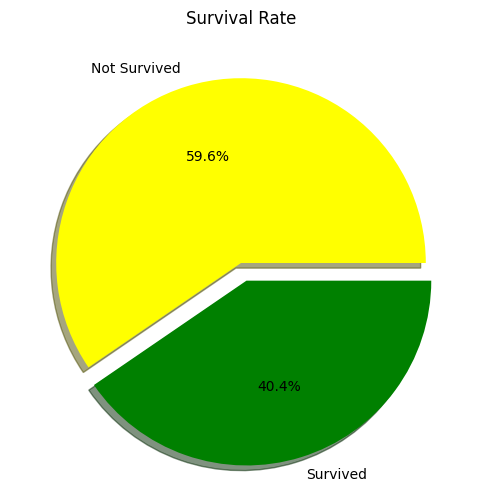

In [207]:
# Shows the survival rate as a percentage of total passengers.

df["Survived"].value_counts().plot(
    kind="pie", autopct="%1.1f%%", colors=["yellow", "green"], figsize=(6, 6),
    labels=["Not Survived", "Survived"], explode=(0, 0.1), shadow=True
)
plt.title("Survival Rate")
plt.ylabel("")
plt.show()


### 4.2.2. Bivariate Analysis (Comparing Two Variables)

### 4.2.2.1. Number of Tickets Sold by Class



The goal is to analyze how many tickets were sold across different passenger classes ("Pclass"). By grouping the dataset by ticket class, we can determine:  
- The total number of tickets sold per class.  
- The percentage distribution of ticket sales among classes.  
- The differences in ticket sales between first, second, and third-class passengers.  

Understanding ticket distribution can provide insights into "passenger demographics, socio-economic status, and survival probabilities" in later analyses.  

In [208]:
# Apply the "groupby" function to group the DataFrame by class.
# Missing values are represented as "NaN".

pclassAllColumns_df = df.groupby("Pclass").count()
pclassAllColumns_df


,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Fare
Pclass,,,,,,,,
1,184,184,184,184,184,184,184,184
2,173,173,173,173,173,173,173,173
3,355,355,355,355,355,355,355,355


In [209]:
# We select a single column "PassengerId" among all columns
pclass_passenger_df = df.groupby("Pclass")["PassengerId"].count()
pclass_passenger_df


,PassengerId
Pclass,
1,184
2,173
3,355


In [210]:
# Replace the column label "PassengerId" with "Tickets Sold" to count the number of tickets sold.
# We slightly adjust the column names to differentiate between the categories.
# "Pclass" and "Tickets Sold"

# Tickets sold per class
tickets_sold_df = df.groupby("Pclass")["PassengerId"].count().to_frame(name="Tickets Sold")
tickets_sold_df


,Tickets Sold
Pclass,
1,184
2,173
3,355


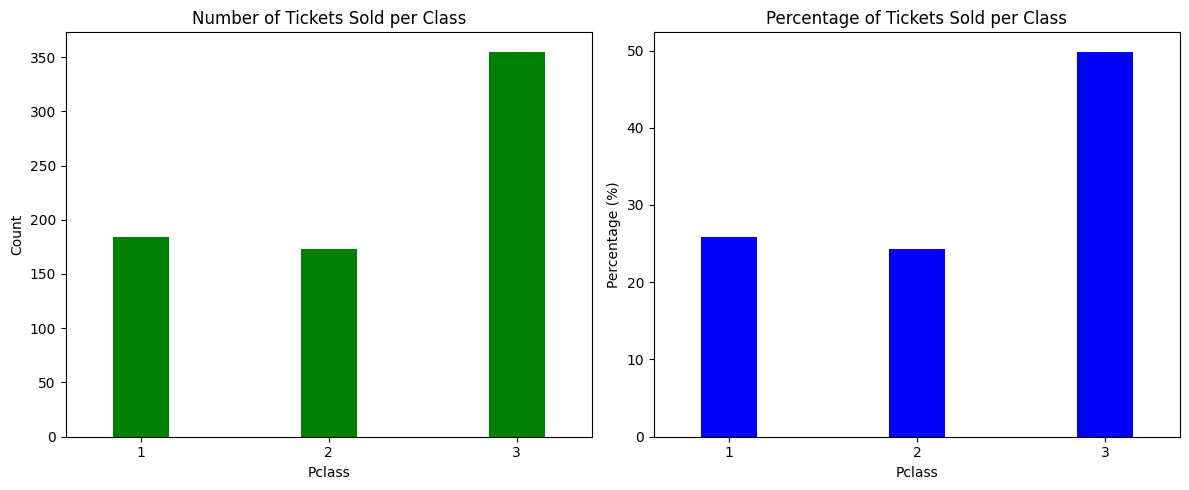

In [211]:
import matplotlib.pyplot as plt
import pandas as pd

# Group data by "Pclass" and count tickets sold
tickets_sold_df = df.groupby("Pclass")["PassengerId"].count().to_frame(name="Tickets Sold")

# Compute frequency distribution (percentage)
tickets_sold_percentage = (tickets_sold_df / tickets_sold_df.sum()) * 100

# Create subplots for count and frequency
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart for count of tickets sold per class
tickets_sold_df.plot(kind="bar", legend=False, color=["green", "blue", "red"], width=0.3, ax=axes[0])
axes[0].set_title("Number of Tickets Sold per Class")
axes[0].set_xlabel("Pclass")
axes[0].set_ylabel("Count")
axes[0].set_xticklabels(tickets_sold_df.index, rotation=0)

# Bar chart for percentage of tickets sold per class
tickets_sold_percentage.plot(kind="bar", legend=False, color=["blue", "green", "red"], width=0.3, ax=axes[1])
axes[1].set_title("Percentage of Tickets Sold per Class")
axes[1].set_xlabel("Pclass")
axes[1].set_ylabel("Percentage (%)")
axes[1].set_xticklabels(tickets_sold_percentage.index, rotation=0)

# Adjust layout for better visibility
plt.tight_layout()
plt.show()


Interpretation of Ticket Sales by Class :

1 Ticket Count Analysis
- First-class: 184 tickets sold  
- Second-class: 173 tickets sold  
- Third-class: 355 tickets sold  

The highest number of tickets sold was in "third class (355 passengers)", nearly "double the first-class tickets (184)". Second-class had a slightly lower count than first-class.

2. Percentage Distribution
To understand the proportion of ticket sales per class:  

- First-class: (184 / (184 + 173 + 355)) × 100 ≈ 24.3%
- Second-class: (173 / (184 + 173 + 355)) × 100 ≈ 22.9%
- Third-class: (355 / (184 + 173 + 355)) × 100 ≈ 52.8%  

3. Insights from the Data
- More than **half of the passengers (52.8%) traveled in third class, indicating it was the most affordable and accessible option.  
- First and second-class passengers combined (47.2%) still made up less than third-class alone, but their presence suggests a considerable number of wealthier travelers on board.  
- The relatively similar number of tickets in first and second class (24.3% vs. 22.9%) suggests a balanced distribution between upper-middle and upper-class passengers.  


### 4.2.2.2. Number of Survivors by Class


The objective of this analysis is to examine the distribution of survivors across different passenger classes. By comparing the number of survivors and total passengers in each class, we aim to:  

- Determine how survival chances varied based on socio-economic status.  
- Calculate the survival rate (%) for each class.  
- Identify disparities in survival likelihood, particularly between first, second, and third-class passengers.  
- Provide insights into how class influenced access to lifeboats and safety measures during the Titanic disaster.  


In [212]:
import pandas as pd

# Group by "Pclass" and calculate the number of survivors and total passengers
df_count_survived_class = df.groupby("Pclass").agg(
    Survived_count=("Survived", lambda x: (x == 1).sum()),  # Count survivors
    # Alternative: Survived_count=("Survived", "sum")  # Works without lambda
    Total_Passengers=("PassengerId", "count")  # Count total passengers per class
).reset_index()

# Calculate survival rate per class
df_count_survived_class["Survival_Rate (%)"] = (df_count_survived_class["Survived_count"] / df_count_survived_class["Total_Passengers"]) * 100

# Display the DataFrame
print(df_count_survived_class)


   Pclass  Survived_count  Total_Passengers  Survival_Rate (%)
0       1             120               184          65.217391
1       2              83               173          47.976879
2       3              85               355          23.943662


In [213]:
import pandas as pd

# Calculate the survival frequency (mean survival rate) for each class
df_survived_class_freq = df.groupby("Pclass")[["Survived"]].mean().reset_index()

# Rename the column for clarity
df_survived_class_freq.rename(columns={"Survived": "Survival_Rate"}, inplace=True)

# Convert survival rate to percentage for better interpretation
df_survived_class_freq["Survival_Rate (%)"] = df_survived_class_freq["Survival_Rate"] * 100

# Display the DataFrame
print(df_survived_class_freq)


   Pclass  Survival_Rate  Survival_Rate (%)
0       1       0.652174          65.217391
1       2       0.479769          47.976879
2       3       0.239437          23.943662


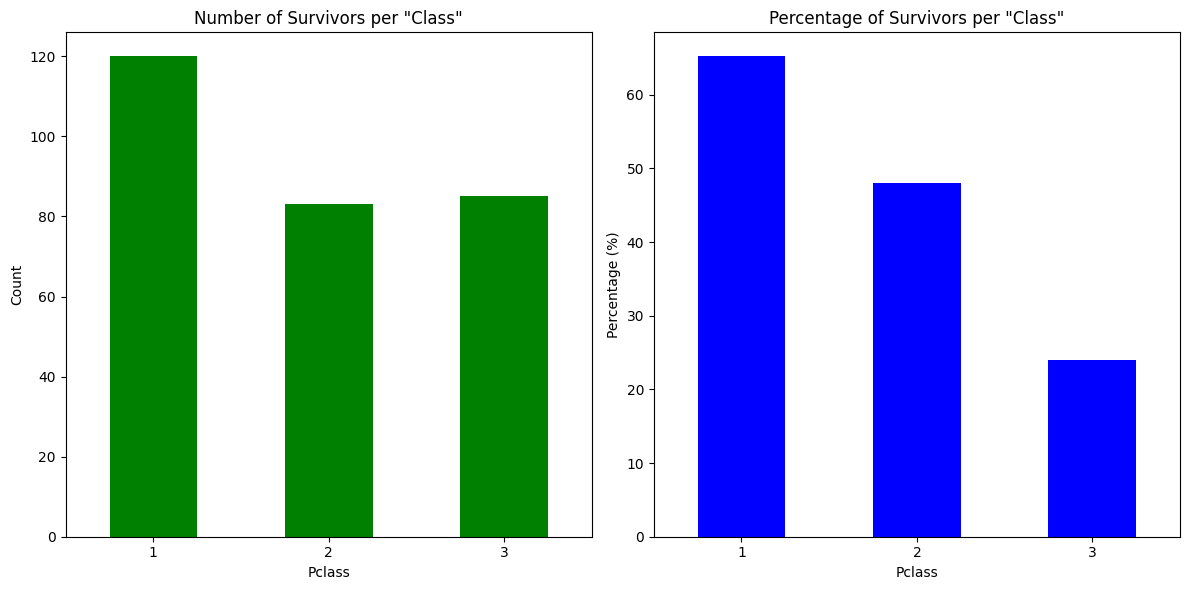

In [214]:
import matplotlib.pyplot as plt

# Create subplots for count and frequency
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart for the count of survivors per class
df_count_survived_class.plot(kind="bar", x="Pclass", y="Survived_count", legend=False, color=["green"], ax=axes[0])
axes[0].set_title('Number of Survivors per "Class"')
axes[0].set_xlabel("Pclass")
axes[0].set_ylabel("Count")
axes[0].set_xticklabels(df_count_survived_class["Pclass"], rotation=0)


# Bar chart for the survival rate per class
df_survived_class_freq.plot(kind="bar", x="Pclass", y="Survival_Rate (%)", legend=False, color=["blue"], ax=axes[1])
axes[1].set_title('Percentage of Survivors per "Class"')
axes[1].set_xlabel("Pclass")
axes[1].set_ylabel("Percentage (%)")
axes[1].set_xticklabels(df_survived_class_freq["Pclass"], rotation=0)


# Adjust layout for better visibility
plt.tight_layout()
plt.show()


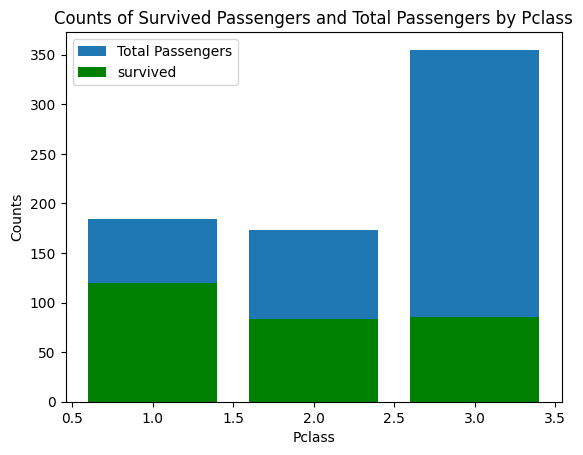

In [215]:
# Plot del grafico in modo gumelatto
plt.bar(df_count_survived_class["Pclass"], df_count_survived_class["Total_Passengers"], label="Total Passengers")
plt.bar(df_count_survived_class["Pclass"], df_count_survived_class["Survived_count"], label="survived", color="green")
plt.xlabel("Pclass")
plt.ylabel("Counts")
plt.title("Counts of Survived Passengers and Total Passengers by Pclass")
plt.legend()
plt.show()

Interpretation:
- In first class, 120 out of 184 passengers survived, resulting in a survival rate of 65.22%. This indicates that first-class passengers had the highest chance of survival.  
- In second class, 83 out of 173 passengers survived, giving a survival rate of 47.98%. This shows a significant drop in survival probability compared to first class.  
- In third class, only 85 out of 355 passengers survived, leading to a survival rate of 23.94%. This highlights that third-class passengers had the lowest chances of survival.  
- The survival rate decreases as the class number increases, suggesting that higher-class passengers had better access to lifeboats and safety measures.  
- The difference in survival rates between first and third class is significant, indicating that socio-economic status played a crucial role in survival chances.  



In [216]:
import pandas as pd

# Count the number of non-survivors and the total number of passengers for each class

df_count_no_survived_class = df.groupby("Pclass").agg(                     # Group by passenger class
    no_survived_count=("Survived", lambda x: (x == 0).sum()),              # Count non-survivors (where Survived == 0)
    Total_Passengers=("PassengerId", "count")                              # Count total passengers per class
).reset_index()                                                            # Reset index for better readability

# Display the DataFrame
print(df_count_no_survived_class)


   Pclass  no_survived_count  Total_Passengers
0       1                 64               184
1       2                 90               173
2       3                270               355


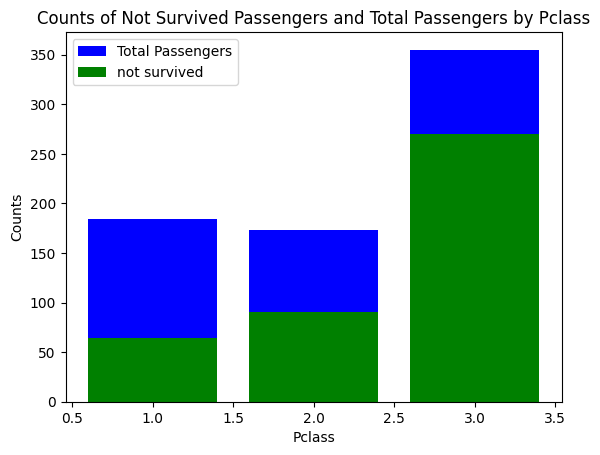

In [217]:
# Plot of the graph: both on the same band.

plt.bar(df_count_no_survived_class["Pclass"], df_count_no_survived_class["Total_Passengers"], label="Total Passengers", color = "blue")
# plt.bar(x1, y1, label1 =legend1, color = "blue", ecc..)
plt.bar(df_count_no_survived_class["Pclass"], df_count_no_survived_class["no_survived_count"], label="not survived", color="green")
# plt.bar(x2, y2, label2 =legend2, color = "green", ecc..)

plt.xlabel("Pclass")
plt.ylabel("Counts")
plt.title("Counts of Not Survived Passengers and Total Passengers by Pclass")
plt.legend()
plt.show()

In [218]:
# OTHER METHOD.
# Create a new column for non-surviving passengers.

df["no_Survived"]= (df["Survived"]==0).astype(int)

# Group by class and aggregate counts.
df_count_no_surv_class_2 = df.groupby("Pclass").agg(
    no_surv_class = ("no_Survived", "sum"),
    Total =("PassengerId","count")
)
df_count_no_surv_class_2

,no_surv_class,Total
Pclass,,
1,64,184
2,90,173
3,270,355


Text(0.5, 1.0, 'Numbers of non survived')

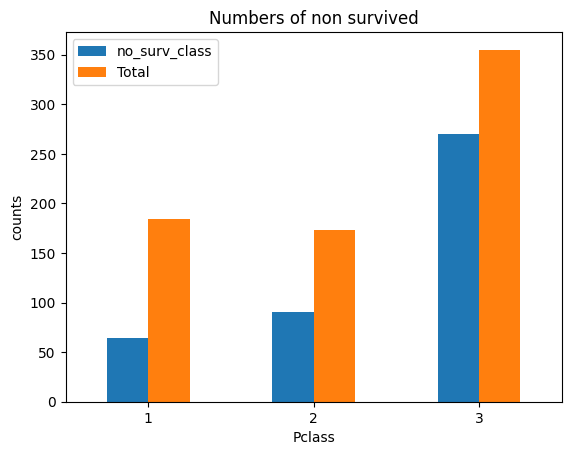

In [219]:
df_count_no_surv_class_2.plot(kind="bar")
plt.xticks (rotation=0)
plt.ylabel("counts")
plt.title("Numbers of non survived")


 Interpretation:  
- In first class, 64 out of 184 passengers did not survive, meaning the non-survival rate was approximately 34.78%. This indicates that first-class passengers had the highest chance of survival compared to other classes.  
- In second class, 90 out of 173 passengers did not survive, giving a non-survival rate of 52.02%. This shows that survival chances dropped significantly compared to first class.  
- In third class, 270 out of 355 passengers did not survive, resulting in a non-survival rate of 76.06%. This highlights that third-class passengers had the highest fatality rate, suggesting that lower-class passengers had more difficulty accessing lifeboats and safety measures.  
- The higher the class, the lower the percentage of non-survivors, indicating that social status played a crucial role in survival chances on the Titanic.  



### 4.2.2.3. Number of Survivors by Gender

In [220]:
import pandas as pd

# Group by 'Sex' and calculate survival count and rate
df_survived_sex = df.groupby("Sex").agg(
    Survived_count=("Survived", lambda x: (x == 1).sum()),  # Count of survivors
    Total_Passengers=("Sex", "count"),  # Count of total passengers per gender
    Survival_Rate=("Survived", "mean")  # Mean survival rate
).reset_index()

# Convert survival rate to percentage
df_survived_sex["Survival_Rate (%)"] = df_survived_sex["Survival_Rate"] * 100

# Display the DataFrame
print(df_survived_sex)


      Sex  Survived_count  Total_Passengers  Survival_Rate  Survival_Rate (%)
0  female             195               259       0.752896          75.289575
1    male              93               453       0.205298          20.529801


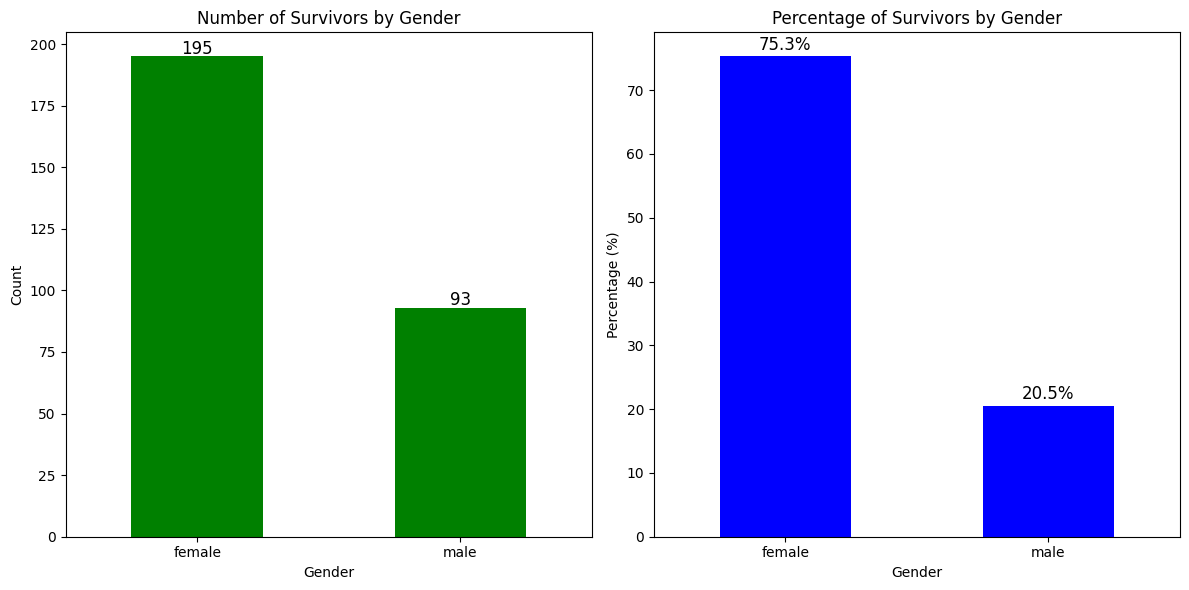

In [221]:
import matplotlib.pyplot as plt

# Create subplots for count and frequency of survivors by gender
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart for the count of survivors per gender
df_survived_sex.plot(kind="bar", x="Sex", y="Survived_count", legend=False, color=["green"], ax=axes[0])
axes[0].set_title("Number of Survivors by Gender")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Count")
axes[0].set_xticklabels(df_survived_sex["Sex"], rotation=0)

# Add labels on top of bars (count)
for index, value in enumerate(df_survived_sex["Survived_count"]):
    axes[0].text(index, value + 1, str(value), ha='center', fontsize=12)

# Bar chart for the survival rate per gender
df_survived_sex.plot(kind="bar", x="Sex", y="Survival_Rate (%)", legend=False, color=["blue"], ax=axes[1])
axes[1].set_title("Percentage of Survivors by Gender")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Percentage (%)")
axes[1].set_xticklabels(df_survived_sex["Sex"], rotation=0)

# Add labels on top of bars (percentage)
for index, value in enumerate(df_survived_sex["Survival_Rate (%)"]):
    axes[1].text(index, value + 1, f"{value:.1f}%", ha='center', fontsize=12)

# Adjust layout for better visibility
plt.tight_layout()
plt.show()


In [222]:
# FIRST METHOD WITH INDEX

# Calculate survival count and total passengers by gender
df_surv_sex_count = df[['Survived', 'Sex']].groupby("Sex").sum()


df_surv_sex_count["Total by Sex"] = df[['Survived', 'Sex']].groupby("Sex").count()

# Reset index for better readability
df_surv_sex_count = df_surv_sex_count.reset_index()
df_surv_sex_count


,Sex,Survived,Total by Sex
0,female,195,259
1,male,93,453


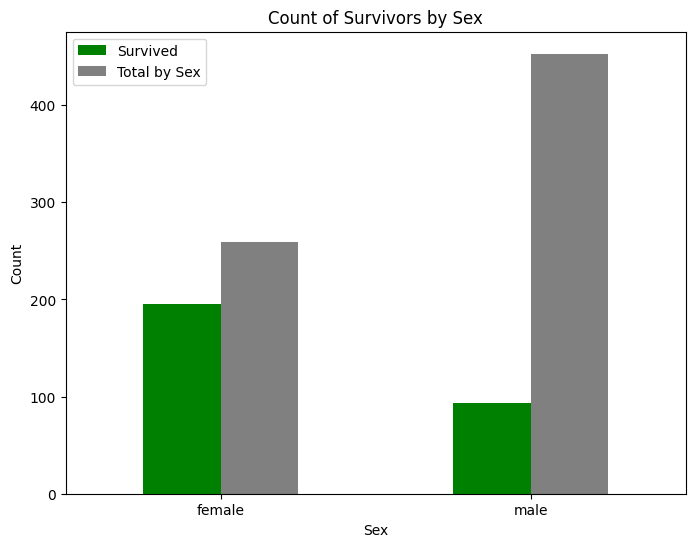

In [223]:
import matplotlib.pyplot as plt

# Plot the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
df_surv_sex_count.plot(kind="bar", x="Sex", ax=ax, color=["green", "gray"])

# Customize the chart
plt.legend()
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.title("Count of Survivors by Sex")

# Show the plot
plt.show()


In [224]:
# SECOND METHOD (WITHOUT INDEX OPTION)

# Group by 'Sex' and calculate the total number of survivors
df_surv_sex_count = df[['Survived','Sex']].groupby("Sex").sum()

# Group by 'Sex' and calculate the total number of passengers per gender
df_surv_sex_count["Total by Sex"] = df[['Survived','Sex']].groupby("Sex").count()

df_surv_sex_count


,Survived,Total by Sex
Sex,,
female,195,259
male,93,453


Text(0.5, 1.0, 'Count survived ')

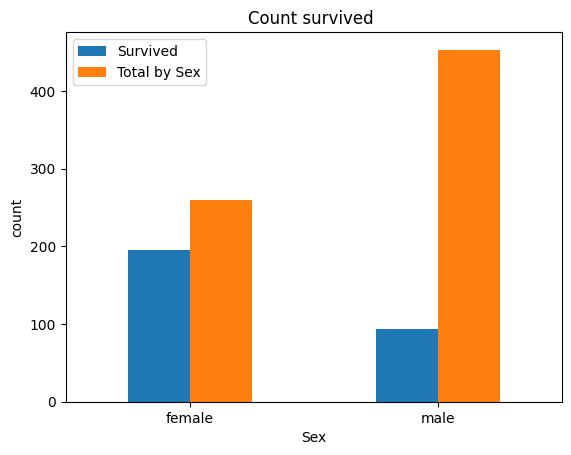

In [225]:
# FIRST METHOD
import matplotlib.pyplot as plt

df_surv_sex_count.plot(kind="bar")
plt.legend()
plt.xticks(rotation=0)
plt.ylabel("count")
plt.title("Count survived ")


Interpretation:  
- Among female passengers, 195 out of 259 survived, resulting in a survival rate of 75.29%. This suggests that women had a significantly higher chance of survival, likely due to the "women and children first" evacuation protocol.  
- Among male passengers, only 93 out of 453 survived, leading to a survival rate of 20.53%. This indicates that men had a much lower probability of survival compared to women.  
- The disparity in survival rates between men and women shows that gender played a crucial role in survival chances. Women were prioritized during evacuation, while men were less likely to secure spots in lifeboats.  
- The survival rate for women is more than three times higher than for men, reinforcing historical accounts that many male passengers sacrificed their chances to let women and children board lifeboats first.  
- This data can also serve as a source for understanding cultural aspects and the importance given to women in society at that time, particularly in life-and-death situations where social norms dictated prioritizing their survival.  



### 4.2.2.4. Survival Rate Based on Age Groups


Goals of This Analysis:
Understand how survival chances varied across different age groups.
Compare the survival rate of children, adults, and elderly passengers.
Identify potential patterns in survival linked to age.
Determine if the "Women and Children First" evacuation rule was applied.


First, let's look at the distribution of values for the age variable, so that we can study the survival parameter as a function of the different age groups.

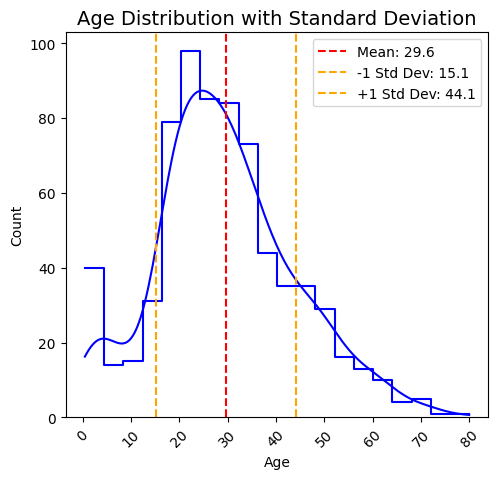

In [226]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate mean and standard deviation of Age
mean_age = df["Age"].mean()
std_age = df["Age"].std()

# Histogram with KDE and standard deviation bands
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df, x="Age", bins=20, kde=True, element="step", multiple="stack", fill=False, color="blue")

# Add vertical lines for mean and standard deviations
plt.axvline(mean_age, color="red", linestyle="--", label=f"Mean: {mean_age:.1f}")
plt.axvline(mean_age - std_age, color="orange", linestyle="--", label=f"-1 Std Dev: {mean_age - std_age:.1f}")
plt.axvline(mean_age + std_age, color="orange", linestyle="--", label=f"+1 Std Dev: {mean_age + std_age:.1f}")

# Formatting
plt.title("Age Distribution with Standard Deviation", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend()

plt.show()


In [227]:
import pandas as pd

# Creating 4 DataFrames based on the second option (Balanced Age Groups)

# Define age groups
children = df[df["Age"] <= 12]                                # 0 - 12 years (Children)
young_adults = df[(df["Age"] > 12) & (df["Age"] <= 25)]       # 13 - 25 years (Young Adults)
middle_adults = df[(df["Age"] > 25) & (df["Age"] <= 40)]      # 26 - 40 years (Middle-aged Adults)
older_adults = df[df["Age"] > 40]                             # 41+ years (Older Adults & Seniors)

# Display the results
print("Children (0-12 years):\n", children.head())
print()
print("\nYoung Adults (13-25 years):\n", young_adults.head())
print()
print("\nMiddle-aged Adults (26-40 years):\n", middle_adults.head())
print()
print("\nOlder Adults & Seniors (41+ years):\n", older_adults.head())


Children (0-12 years):
     PassengerId  Survived  Pclass                                      Name  \
7             8         0       3            Palsson, Master. Gosta Leonard   
10           11         1       3           Sandstrom, Miss. Marguerite Rut   
16           17         0       3                      Rice, Master. Eugene   
24           25         0       3             Palsson, Miss. Torborg Danira   
43           44         1       2  Laroche, Miss. Simonne Marie Anne Andree   

       Sex  Age  SibSp  Parch     Fare  no_Survived  
7     male  2.0      3      1  21.0750            1  
10  female  4.0      1      1  16.7000            0  
16    male  2.0      4      1  29.1250            1  
24  female  8.0      3      1  21.0750            1  
43  female  3.0      1      2  41.5792            0  


Young Adults (13-25 years):
     PassengerId  Survived  Pclass                                  Name  \
0             1         0       3               Braund, Mr. Owen Harris

In [228]:
import pandas as pd

# Function to calculate survival statistics
def survival_stats(df, age_group_name):
    total_passengers = len(df)
    survived_count = df["Survived"].sum()
    survival_rate = (survived_count / total_passengers) * 100 if total_passengers > 0 else 0

    return {
        "Age Group": age_group_name,
        "Total Passengers": total_passengers,
        "Survived Count": survived_count,
        "Survival Rate (%)": round(survival_rate, 2)
    }

# Calculate statistics for each age group
children_stats = survival_stats(children, "Children \n(0-12 years)")
young_adults_stats = survival_stats(young_adults, "Young Adults\n (13-25 years)")
middle_adults_stats = survival_stats(middle_adults, "Middle-aged Adults\n (26-40 years)")
older_adults_stats = survival_stats(older_adults, "Older Adults & \n Seniors (41+ years)")

# Create a DataFrame for comparison
df_survival_by_age_group = pd.DataFrame([
    children_stats,
    young_adults_stats,
    middle_adults_stats,
    older_adults_stats
])

# Display the results
# print(df_survival_by_age_group)
df_survival_by_age_group


,Age Group,Total Passengers,Survived Count,Survival Rate (%)
0,Children \n(0-12 years),69,40,57.97
1,Young Adults\n (13-25 years),232,84,36.21
2,Middle-aged Adults\n (26-40 years),262,110,41.98
3,Older Adults & \n Seniors (41+ years),149,54,36.24


<ipython-input-229-58bb2966c31b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_survival_by_age_group, x='Survived Count', y='Age Group', inner='stick', palette='Dark2')


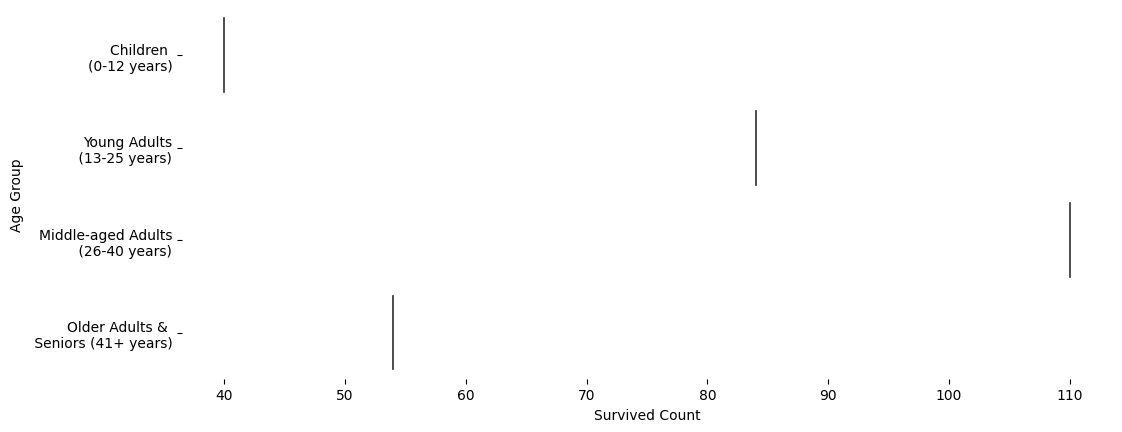

In [229]:
# @title Age Group vs Survived Count

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_survival_by_age_group['Age Group'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_survival_by_age_group, x='Survived Count', y='Age Group', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

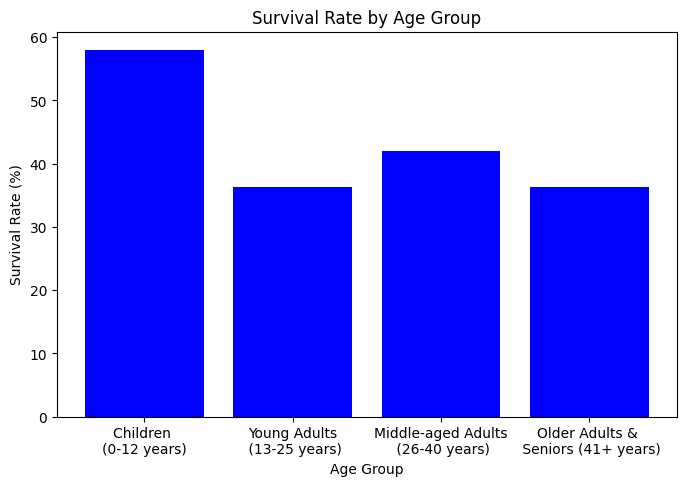

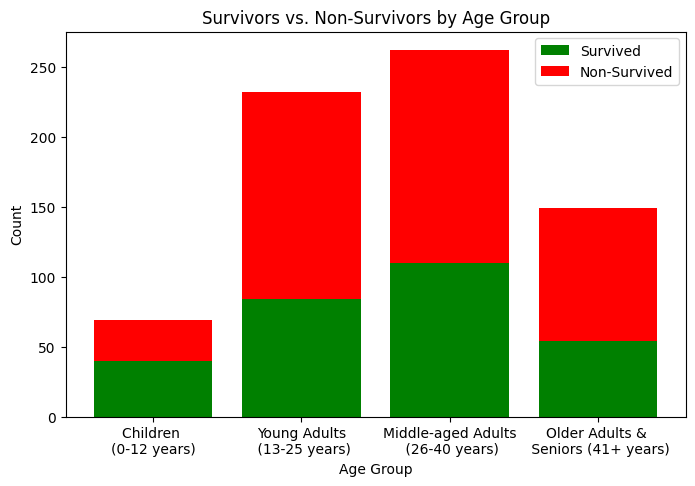

In [230]:
import pandas as pd
import matplotlib.pyplot as plt


# Bar Chart: Comparison of Survival Rate per Age Group
plt.figure(figsize=(8, 5))
plt.bar(df_survival_by_age_group["Age Group"], df_survival_by_age_group["Survival Rate (%)"], color="blue")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Age Group")
plt.xticks(rotation=0)
plt.show()

# Stacked Bar Chart: Survivors vs. Non-survivors per Age Group
fig, ax = plt.subplots(figsize=(8, 5))
survived = df_survival_by_age_group["Survived Count"]
non_survived = df_survival_by_age_group["Total Passengers"] - df_survival_by_age_group["Survived Count"]
categories = df_survival_by_age_group["Age Group"]

bar1 = ax.bar(categories, survived, color="green", label="Survived")
bar2 = ax.bar(categories, non_survived, bottom=survived, color="red", label="Non-Survived")

ax.set_title("Survivors vs. Non-Survivors by Age Group")
ax.set_xlabel("Age Group")
ax.set_ylabel("Count")
ax.legend()
plt.xticks(rotation=0)
plt.show()


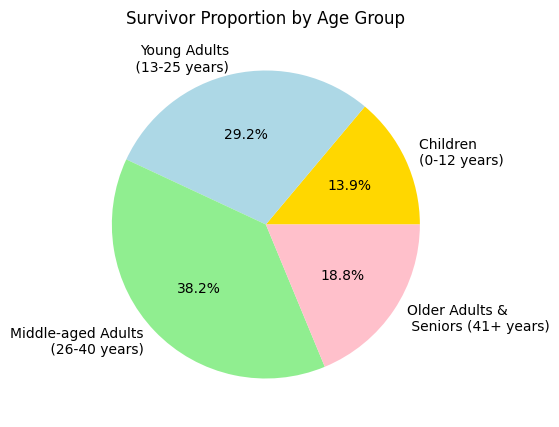

In [231]:
# Pie Chart: Survivor Proportion per Age Group
plt.figure(figsize=(8, 5))
plt.pie(df_survival_by_age_group["Survived Count"], labels=df_survival_by_age_group["Age Group"], autopct="%1.1f%%", colors=["gold", "lightblue", "lightgreen", "pink"])
plt.title("Survivor Proportion by Age Group")
plt.show()


Interpretation of Survival Rates by Age Group  

1. Children (0-12 years) had the highest survival rate (57.97%).  
   - This supports the "Women and children first" evacuation policy.  
   - They were likely given priority access to lifeboats.  

2. Young Adults (13-25 years) had the lowest survival rate (36.21%).  
   - This age group includes many teenagers and young men, who may have been less prioritized in rescue efforts.  
   - Young men in particular may have faced lower survival chances due to the "Save women and children first" rule.  

3. Middle-aged Adults (26-40 years) had a survival rate of 41.98%, higher than young adults.  
   - This group includes parents and working-class passengers who may have prioritized their families' safety.  
   - Women in this group likely had higher survival rates than men.  

4. Older Adults & Seniors (41+ years) had a survival rate of 36.24%, similar to young adults.  
   - Older passengers may have had physical difficulties evacuating quickly.  
   - They were likely given less priority compared to children and younger women.  

Key Observations  
- Children had the highest survival rate, confirming evacuation priorities.  
- Young adults and seniors had the lowest survival rates, possibly due to gender biases and physical limitations.  
- Middle-aged adults had slightly better survival chances, likely influenced by gender and social roles.  



In [232]:
import pandas as pd

# Function to calculate survival statistics by gender within age groups
def survival_by_gender(df, age_group_name):
    gender_stats = df.groupby("Sex")["Survived"].agg(["sum", "count"])
    gender_stats["Survival Rate (%)"] = (gender_stats["sum"] / gender_stats["count"]) * 100
    gender_stats.reset_index(inplace=True)
    gender_stats["Age Group"] = age_group_name
    return gender_stats

# Calculate survival rates for males and females in each age group
children_gender_stats = survival_by_gender(children, "Children \n(0-12 years)")
young_adults_gender_stats = survival_by_gender(young_adults, "Young Adults\n (13-25 years)")
middle_adults_gender_stats = survival_by_gender(middle_adults, "Middle-aged\n Adults\n (26-40 years)")
older_adults_gender_stats = survival_by_gender(older_adults, "Older Adults\n & Seniors\n (41+ years)")

# Combine all results into a single DataFrame
df_survival_by_age_gender = pd.concat([children_gender_stats, young_adults_gender_stats, middle_adults_gender_stats, older_adults_gender_stats])

# Display the results
print(df_survival_by_age_gender)


      Sex  sum  count  Survival Rate (%)  \
0  female   19     32          59.375000   
1    male   21     37          56.756757   
0  female   68     90          75.555556   
1    male   16    142          11.267606   
0  female   72     90          80.000000   
1    male   38    172          22.093023   
0  female   36     47          76.595745   
1    male   18    102          17.647059   

                                Age Group  
0                 Children \n(0-12 years)  
1                 Children \n(0-12 years)  
0            Young Adults\n (13-25 years)  
1            Young Adults\n (13-25 years)  
0    Middle-aged\n Adults\n (26-40 years)  
1    Middle-aged\n Adults\n (26-40 years)  
0  Older Adults\n & Seniors\n (41+ years)  
1  Older Adults\n & Seniors\n (41+ years)  


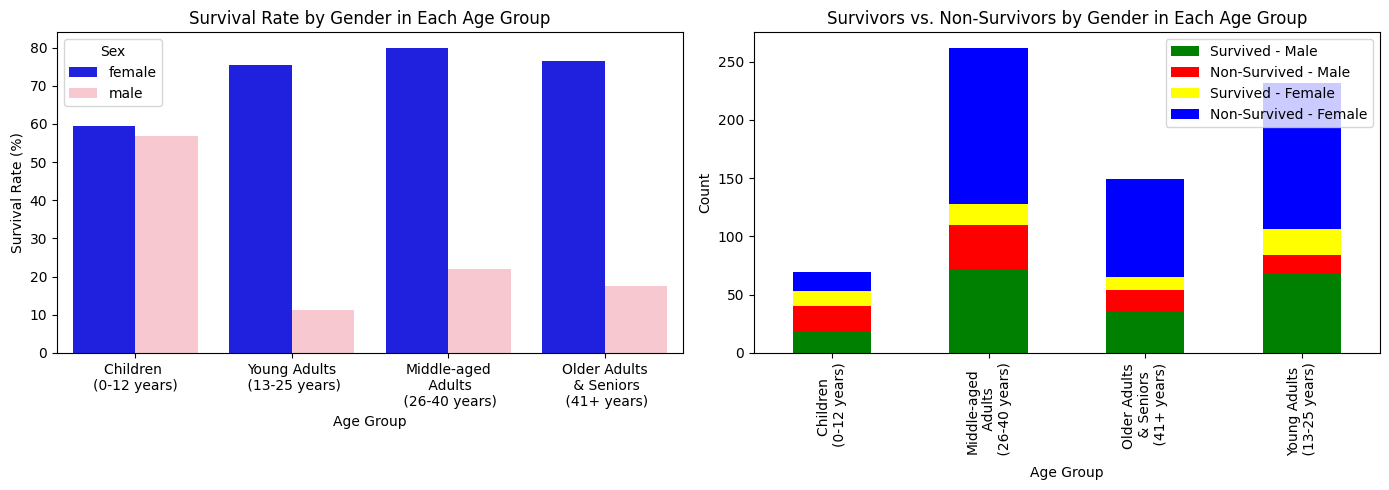

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size for subplots
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# 1. Bar Chart: Survival Rate by Gender in Each Age Group
sns.barplot(data=df_survival_by_age_gender, x="Age Group", y="Survival Rate (%)", hue="Sex", palette=["blue", "pink"], ax=axes[0])
axes[0].set_title("Survival Rate by Gender in Each Age Group")
axes[0].set_xlabel("Age Group")
axes[0].set_ylabel("Survival Rate (%)")
axes[0].legend(title="Sex")

# 2. Stacked Bar Chart: Survivors vs. Non-Survivors by Gender in Each Age Group
df_survival_by_age_gender["Non-Survivors"] = df_survival_by_age_gender["count"] - df_survival_by_age_gender["sum"]
df_pivot = df_survival_by_age_gender.pivot(index="Age Group", columns="Sex", values=["sum", "Non-Survivors"])

df_pivot.plot(kind="bar", stacked=True, color=["green", "red", "yellow", "blue"], ax=axes[1])
axes[1].set_title("Survivors vs. Non-Survivors by Gender in Each Age Group")
axes[1].set_xlabel("Age Group")
axes[1].set_ylabel("Count")
axes[1].legend(["Survived - Male", "Non-Survived - Male", "Survived - Female", "Non-Survived - Female"])

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


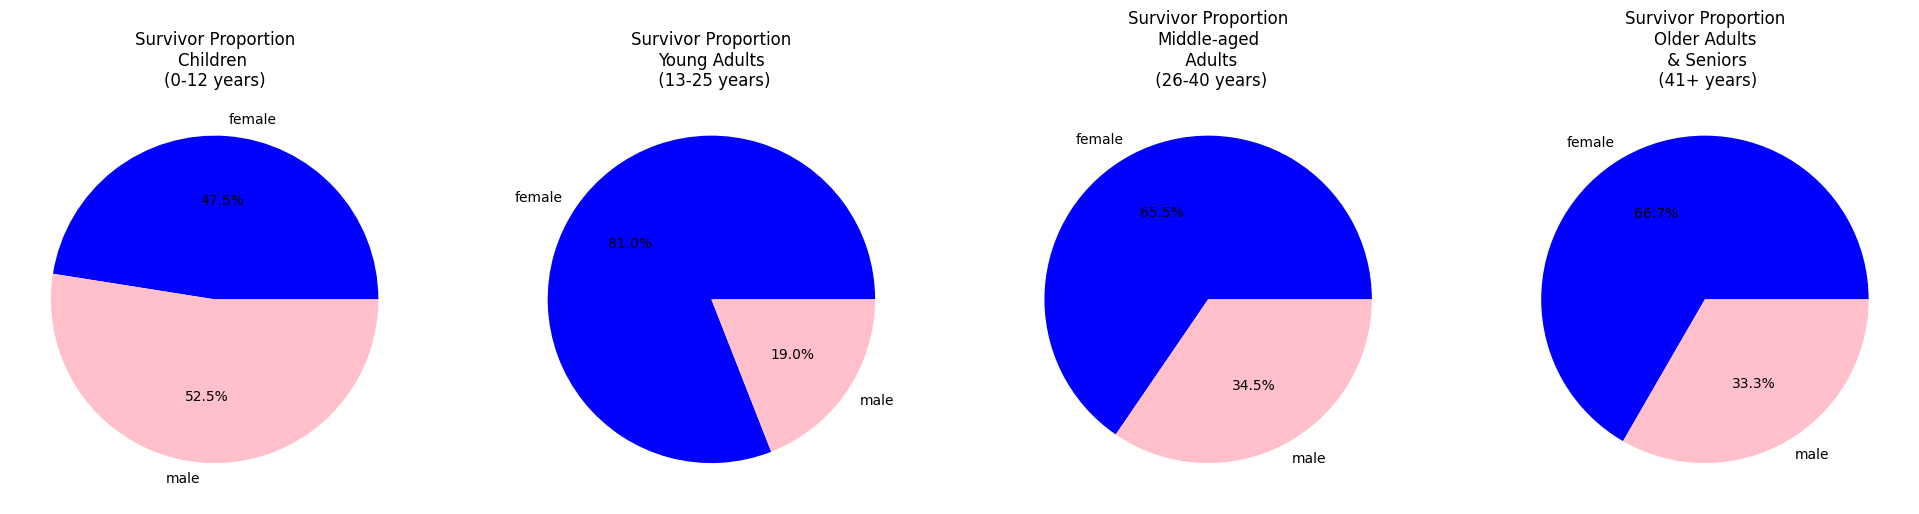

In [234]:
import matplotlib.pyplot as plt

# Unique age groups
age_groups = df_survival_by_age_gender["Age Group"].unique()

# Create subplots: 1 row if there are 4 groups, otherwise 2 rows
fig, axes = plt.subplots(1, len(age_groups), figsize=(20, 5)) if len(age_groups) <= 4 else plt.subplots(2, (len(age_groups) + 1) // 2, figsize=(15, 10))

# Flatten axes in case of a 2-row layout
axes = axes.flatten()

# Generate pie charts for each age group
for i, age_group in enumerate(age_groups):
    subset = df_survival_by_age_gender[df_survival_by_age_gender["Age Group"] == age_group]
    axes[i].pie(subset["sum"], labels=subset["Sex"], autopct="%1.1f%%", colors=["blue", "pink"])
    axes[i].set_title(f"Survivor Proportion\n{age_group}")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


Interpretation of Survival Rates by Gender and Age Group  

1. Children (0-12 years)  
   - Females had a survival rate of 59.38%.  
   - Males had a survival rate of 56.76%, which is very close to that of females.  
   - This suggests that both boys and girls had similar chances of survival, likely because children were prioritized regardless of gender.  

2. Young Adults (13-25 years)  
   - Females had a survival rate of 75.56%, while males had only 11.27%.  
   - This extreme difference indicates that young women were highly prioritized, whereas young men had very low chances of survival.  
   - This aligns with the "Women and children first" rule, where young men were often left behind.  

3. Middle-aged Adults (26-40 years)  
   - Females had a survival rate of 80.00%, whereas males had only 22.09%.  
   - Similar to young adults, women were much more likely to survive than men.  
   - The survival rate for men improved slightly compared to younger males but remained significantly lower than that of women.  

4. Older Adults & Seniors (41+ years)  
   - Females had a survival rate of 76.60%, while males had only 17.65%.  
   - Elderly women had a much higher survival rate than elderly men, reinforcing the idea that gender played a major role in survival chances.  
   - Older men likely had difficulties evacuating and were not prioritized as much as younger men or women.  

Key Observations  
- Children (boys and girls) had similar survival rates, showing that gender was not a major factor in that group.  
- Young adult males had the lowest survival rate (11.27%), likely because they were given the lowest priority.  
- Females had the highest survival rates across all age groups, reinforcing the strong gender bias in survival priorities.  
- Older men had a very low survival rate (17.65%), likely due to physical limitations and lower evacuation priority.  


### 4.2.2.4. Analysis of Survival Rate by Fare Paid

In [235]:
import pandas as pd

# Group by survived status and compute average fare statistics
fare_survival_stats = df.groupby("Survived")["Fare"].agg(["mean", "median", "min", "max"])

# Create fare bins to analyze fare impact on survival
df["Fare Category"] = pd.qcut(df["Fare"], q=4, labels=["Low", "Medium", "High", "Very High"])

# Calculate survival rate per fare category
fare_category_stats = df.groupby("Fare Category")["Survived"].agg(["sum", "count"])
fare_category_stats["Survival Rate (%)"] = (fare_category_stats["sum"] / fare_category_stats["count"]) * 100

# Display the results
print(fare_category_stats)


               sum  count  Survival Rate (%)
Fare Category                               
Low             39    191          20.418848
Medium          53    165          32.121212
High            87    179          48.603352
Very High      109    177          61.581921


<ipython-input-235-7065ad321aed>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_category_stats = df.groupby("Fare Category")["Survived"].agg(["sum", "count"])


<ipython-input-236-5070311eb991>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fare_category_stats.index, y=fare_category_stats["Survival Rate (%)"], palette="Blues", ax=axes[0])
<ipython-input-236-5070311eb991>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Survived"], y=df["Fare"], palette=["red", "green"], ax=axes[1])
<ipython-input-236-5070311eb991>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(["Not Survived", "Survived"])


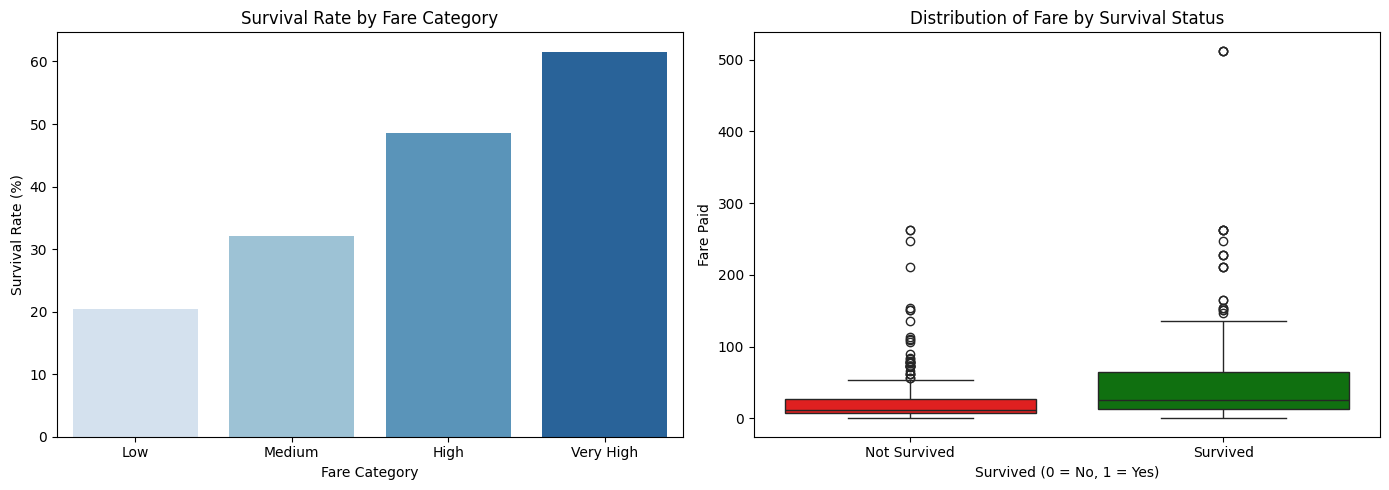

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1 Bar Chart: Survival Rate by Fare Category
sns.barplot(x=fare_category_stats.index, y=fare_category_stats["Survival Rate (%)"], palette="Blues", ax=axes[0])
axes[0].set_xlabel("Fare Category")
axes[0].set_ylabel("Survival Rate (%)")
axes[0].set_title("Survival Rate by Fare Category")

# 2. Boxplot: Distribution of Fare by Survival Status
sns.boxplot(x=df["Survived"], y=df["Fare"], palette=["red", "green"], ax=axes[1])
axes[1].set_xlabel("Survived (0 = No, 1 = Yes)")
axes[1].set_ylabel("Fare Paid")
axes[1].set_title("Distribution of Fare by Survival Status")
axes[1].set_xticklabels(["Not Survived", "Survived"])

# Adjust layout and display plots
plt.tight_layout()
plt.show()


Interpretation of Survival Rate by Fare Category  

1. Low Fare (Cheapest Tickets)  
   - This group had 191 passengers, but the survival rate was only 20.42%.  
   - Passengers who paid the lowest fares had the lowest survival rate, possibly because they belonged to lower-class sections of the ship, which had fewer evacuation opportunities.  

2. Medium Fare  
   - This group had 165 passengers with a survival rate of 32.12%, slightly higher than the low-fare group.  
   - While survival improved, it was still relatively low, suggesting that passengers in this range still faced challenges in accessing lifeboats.  

3. High Fare  
   - This category had 179 passengers with a survival rate of 48.60%.  
   - The survival rate was significantly better than the lower fare categories, reinforcing the idea that higher-paying passengers had better access to safety.  

4. Very High Fare (Most Expensive Tickets)  
   - This group had 177 passengers with the highest survival rate of 61.58%.  
   - Passengers who paid the highest fares had the greatest chance of survival, likely because they were in first-class accommodations, which had better access to lifeboats and were given priority during evacuation.  

Key Observations  
- Survival rate increases with ticket price, indicating a strong correlation between socio-economic status and survival.  
- Passengers in the lowest fare category had the lowest survival rate (20.42%), suggesting that they faced the most difficulties in evacuation.  
- First-class passengers (Very High Fare) had a much higher survival rate (61.58%), likely due to better cabin locations and higher priority for rescue.  
- The gap between "High" and "Very High" fare groups is smaller than between "Low" and "Medium" groups, indicating that after a certain price threshold, survival chances were more stable.  


### 4.2.2.5. Survival Rate by Family Size

In [237]:
import pandas as pd

# Create a new column for total family members onboard
df["Family Size"] = df["SibSp"] + df["Parch"] + 1  # +1 to include the passenger

# Group by family size and compute survival statistics
family_size_stats = df.groupby("Family Size")["Survived"].agg(["sum", "count"])
family_size_stats["Survival Rate (%)"] = (family_size_stats["sum"] / family_size_stats["count"]) * 100

# Display the results
print(family_size_stats)


             sum  count  Survival Rate (%)
Family Size                               
1            128    402          31.840796
2             76    139          54.676259
3             53     93          56.989247
4             21     27          77.777778
5              3     11          27.272727
6              3     22          13.636364
7              4     12          33.333333
8              0      6           0.000000


<ipython-input-238-2205d889215a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=family_size_stats.index, y=family_size_stats["Survival Rate (%)"], palette="Blues", ax=axes[0])


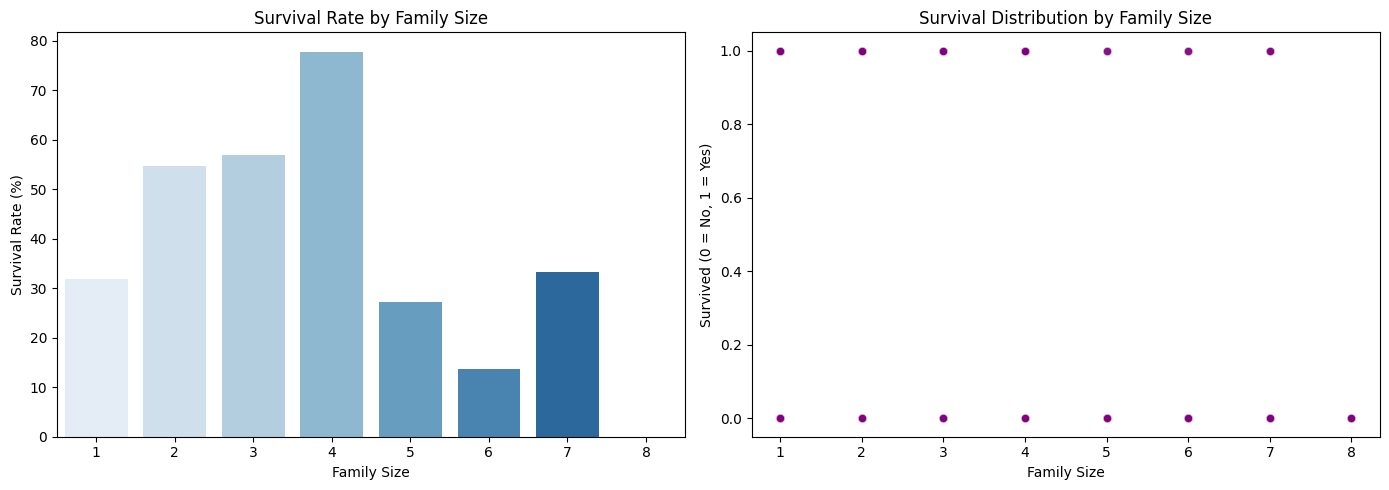

In [238]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Bar Chart: Survival Rate by Family Size
sns.barplot(x=family_size_stats.index, y=family_size_stats["Survival Rate (%)"], palette="Blues", ax=axes[0])
axes[0].set_xlabel("Family Size")
axes[0].set_ylabel("Survival Rate (%)")
axes[0].set_title("Survival Rate by Family Size")

# 2. Scatter Plot: Relationship Between Family Size and Survival
sns.scatterplot(x=df["Family Size"], y=df["Survived"], alpha=0.6, color="purple", ax=axes[1])
axes[1].set_xlabel("Family Size")
axes[1].set_ylabel("Survived (0 = No, 1 = Yes)")
axes[1].set_title("Survival Distribution by Family Size")

# Adjust layout and display plots
plt.tight_layout()
plt.show()


Interpretation of Survival Rate by Family Size  

1. Single Passengers (Family Size = 1)  
   - This was the largest group with 402 passengers, but the survival rate was only 31.84%.  
   - Solo travelers had one of the lowest survival rates, possibly because they had no close family support during evacuation.  

2. Small Families (Family Size = 2-3)  
   - Passengers with one or two family members (Family Size = 2 or 3) had higher survival rates of 54.68% and 56.99%, respectively.  
   - This suggests that having a small family unit increased survival chances, likely because they could help each other find lifeboats.  

3. Medium Families (Family Size = 4)  
   - Survival rate was 77.78%, the highest among all groups.  
   - These families likely stayed together and were prioritized for evacuation.  

4. Large Families (Family Size = 5-6)  
   - Survival rates drop sharply to 27.27% (Family Size = 5) and 13.64% (Family Size = 6).  
   - Larger families may have had difficulty staying together during the chaos, reducing their survival chances.  

5. Very Large Families (Family Size = 7-8)  
   - Family Size = 7 had a slightly higher survival rate (33.33%) but was still low.  
   - No one survived from families of size 8 (0.00%), indicating extreme difficulty evacuating together.  

Key Observations  
- Small to medium family sizes (2-4 members) had the best survival chances, likely due to better coordination.  
- Solo travelers had a relatively low survival rate, possibly due to lack of assistance.  
- Large families (5+) had a much lower survival rate, possibly due to challenges in staying together during evacuation.  
- Extremely large families (8 members) had no survivors, suggesting that very large groups were at a major disadvantage.  


## Upcoming Enhancements: Data Merging and Joining Techniques


In the next phase of the project, we will incorporate advanced data manipulation techniques such as "join", "merge", and "concat" to further enhance the dataset and improve feature engineering. These operations will allow us to efficiently combine multiple datasets, handle missing information, and create enriched variables for predictive modeling.  

Planned operations:  
- "merge()": Used to combine datasets based on common keys (e.g., passenger ID). This is useful when integrating additional datasets, such as complementary passenger records or survival-related details.  
- "join()": Will be used for merging dataframes based on their index values, particularly for aligning datasets with similar structures.  
- "concat()": Helps in stacking datasets either vertically (row-wise) or horizontally (column-wise), useful for appending new features or aggregating different subsets of data.  

These data merging operations will be crucial in preparing a more comprehensive dataset for our machine learning models, ensuring that all relevant information is available for analysis.  

Stay tuned for the next update where we will integrate these techniques into the project.

# II. DATA SCIENCE & MACHINE LEARNING: TITANIC

Next Steps: Data Science & Machine Learning  

The first phase of the project, focusing on exploratory data analysis and statistical examination, has been successfully completed. We have analyzed the dataset structure, cleaned the data, and conducted univariate and bivariate analyses to understand the factors influencing passenger survival.  

Currently, we are working on the second phase of the project: Data Science & Machine Learning, which will focus on building predictive models to determine passengers' survival probabilities based on the available features.  

This phase will include:  
- Advanced preprocessing and feature engineering to optimize dataset variables  
- Selection and training of machine learning models for survival prediction  
- Performance evaluation of models to identify the most effective solution  

The results of the second phase will be included and shared in the next update.